<a href="https://colab.research.google.com/github/diagutierrezro/Mineria_datos_proy_final/blob/main/Entrega_Final_proyecto_Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Universidad Nacional de Colombia
# Minería de Datos
**Diego Gutierrez**



---



In [1]:
!pip install rpy2==3.5.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 201 kB 1.5 MB/s 
  Created wheel for rpy2: filename=rpy2-3.5.1-cp38-cp38-linux_x86_64.whl size=310198 sha256=46d076abcbcc5c8fb2fd4451a36773317197bbab83fd0a9947e217814319788b
  Stored in directory: /root/.cache/pip/wheels/6b/40/7d/f63e87fd83e8b99ee837c8e3489081c4b3489134bc520235ed
Successfully built rpy2
  Attempting uninstall: rpy2
    Found existing installation: rpy2 3.5.5
    Uninstalling rpy2-3.5.5:
      Successfully uninstalled rpy2-3.5.5


In [2]:
# R
%load_ext rpy2.ipython

In [3]:
# Python
import pandas as pd 
import numpy as np
from scipy.stats import trim_mean
from numpy import mean, absolute 

**Conjunto de Datos: Diabetes**

Diabetes Health Indicators Dataset


*   Diabetes Health Indicators Dataset 	https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset?select=diabetes_binary_5050split_health_indicators_BRFSS2015.csv
*    70.692 registros
*    22 variables, 1 es la clase
*    La clase indica si la persona no tiene diabetes o si por el contrario tiene diabetes o prediabetes  
*  La clase es: 0 o 1, 0 si la persona no tiene diabetes y 1 si tiene prediabetes o diabetes. 35346 registros de cada clase



Verificar si el dataset se ha cargado, mirando la pestaña de **archivos**. Si no, cargar el archivo *diabetes50.data*. Para ejecutarlo:

# **ANALISIS DESCRIPTIVO**

In [ ]:
#R
%%R
data <- read.csv("diabetes50.data", header=FALSE)
names(data) <- c("Diabetes_binary", "HighBP", "HighChol", "CholCheck", "BMI", "Smoker", "Stroke", "HeartDiseaseorAttack", "PhysActivity", "Fruits", "Veggies", "HvyAlcoholConsump", "AnyHealthcare", "NoDocbcCost", "GenHlth", "MentHlth", "PhysHlth", "DiffWalk", "Sex" ,"Age" , "Education", "Income")

In [ ]:
# Python
data = pd.read_csv("./diabetes50.data", names=["Diabetes_binary", "HighBP", "HighChol", "CholCheck", "BMI", "Smoker", "Stroke", "HeartDiseaseorAttack", "PhysActivity", "Fruits", "Veggies", "HvyAlcoholConsump", "AnyHealthcare", "NoDocbcCost", "GenHlth", "MentHlth", "PhysHlth", "DiffWalk", "Sex" ,"Age" , "Education", "Income"]) 
data1 = pd.read_csv("./diabetes50.data", names=["Diabetes_binary", "HighBP", "HighChol", "CholCheck", "BMI", "Smoker", "Stroke", "HeartDiseaseorAttack", "PhysActivity", "Fruits", "Veggies", "HvyAlcoholConsump", "AnyHealthcare", "NoDocbcCost", "GenHlth", "MentHlth", "PhysHlth", "DiffWalk", "Sex" ,"Age" , "Education", "Income"]) 

Ver el conjunto de datos:

In [ ]:
#Python
data

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,1.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,0.0,0.0,6.0,4.0,1.0
70688,1.0,0.0,1.0,1.0,29.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,2.0,0.0,0.0,1.0,1.0,10.0,3.0,6.0
70689,1.0,1.0,1.0,1.0,25.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,5.0,15.0,0.0,1.0,0.0,13.0,6.0,4.0
70690,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0


In [ ]:
#Python
data.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


**Frecuencia**

In [ ]:
# Lenguaje R
%%R
table(data$Diabetes_binary)


    0     1 
35346 35346 


In [ ]:
# Lenguaje R
%%R
table(data$HighBP)


    0     1 
30860 39832 


In [ ]:
# Lenguaje R
%%R
table(data$HighChol)


    0     1 
33529 37163 


In [ ]:
# Lenguaje R
%%R
table(data$CholCheck)


    0     1 
 1749 68943 


In [ ]:
# Lenguaje R
%%R
table(data$BMI)


  12   13   14   15   16   17   18   19   20   21   22   23   24   25   26   27 
   1    8    8   30   70  170  366  691 1256 2028 2778 3315 4392 4031 4975 6327 
  28   29   30   31   32   33   34   35   36   37   38   39   40   41   42   43 
4583 4219 4344 3753 3481 3159 2564 2107 1794 1607 1415 1189  970  701  686  665 
  44   45   46   47   48   49   50   51   52   53   54   55   56   57   58   59 
 456  373  359  272  236  195  195  122  111  109   57   79   50   37   44   25 
  60   61   62   63   64   65   66   67   68   69   70   71   72   73   74   75 
  29   20   18   20    9   11    9    8    7    4    5    9    9   12    1    9 
  76   77   78   79   80   81   82   83   84   85   86   87   89   92   95   98 
   2   18    1   17    1    9   11    1   13    1    1   13    4    9    4    4 


In [ ]:
# Lenguaje R
%%R
table(data$Smoker)


    0     1 
37094 33598 


In [ ]:
# Lenguaje R
%%R
table(data$Stroke)


    0     1 
66297  4395 


In [ ]:
# Lenguaje R
%%R
table(data$HeartDiseaseorAttack)


    0     1 
60243 10449 


In [ ]:
# Lenguaje R
%%R
table(data$PhysActivity)


    0     1 
20993 49699 


In [ ]:
# Lenguaje R
%%R
table(data$Fruits)


    0     1 
27443 43249 


In [ ]:
# Lenguaje R
%%R
table(data$Veggies)


    0     1 
14932 55760 


In [ ]:
# Lenguaje R
%%R
table(data$HvyAlcoholConsump)


    0     1 
67672  3020 


In [ ]:
# Lenguaje R
%%R
table(data$AnyHealthcare)


    0     1 
 3184 67508 


In [ ]:
# Lenguaje R
%%R
table(data$NoDocbcCost)


    0     1 
64053  6639 


In [ ]:
# Lenguaje R
%%R
table(data$GenHlth)


    1     2     3     4     5 
 8282 19872 23427 13303  5808 


In [ ]:
# Lenguaje R
%%R
table(data$MentHlth)


    0     1     2     3     4     5     6     7     8     9    10    11    12 
48091  2051  3267  1967   981  2519   288   825   198    28  1924     8   130 
   13    14    15    16    17    18    19    20    21    22    23    24    25 
   15   353  1767    28    18    42     7  1125    84    22    13    10   425 
   26    27    28    29    30 
   17    17    99    53  4320 


In [ ]:
# Lenguaje R
%%R
table(data$PhysHlth)


    0     1     2     3     4     5     6     7     8     9    10    11    12 
39915  2853  4102  2438  1376  2332   447  1326   276    55  1980    22   205 
   13    14    15    16    17    18    19    20    21    22    23    24    25 
   26   802  1913    50    35    50    10  1292   229    31    27    24   557 
   26    27    28    29    30 
   26    34   211    95  7953 


In [ ]:
# Lenguaje R
%%R
table(data$DiffWalk)


    0     1 
52826 17866 


In [ ]:
# Lenguaje R
%%R
table(data$Sex)


    0     1 
38386 32306 


In [ ]:
# Lenguaje R
%%R
table(data$Age)


    1     2     3     4     5     6     7     8     9    10    11    12    13 
  979  1396  2049  2793  3520  4648  6872  8603 10112 10856  8044  5394  5426 


In [ ]:
# Lenguaje R
%%R
table(data$Education)


    1     2     3     4     5     6 
   75  1647  3447 19473 20030 26020 


In [ ]:
# Lenguaje R
%%R
table(data$Income)


    1     2     3     4     5     6     7     8 
 3611  4498  5557  6658  8010 10287 11425 20646 


In [ ]:
#Python
data.groupby('BMI').size()

BMI
12.0     1
13.0     8
14.0     8
15.0    30
16.0    70
        ..
87.0    13
89.0     4
92.0     9
95.0     4
98.0     4
Length: 80, dtype: int64

**Frecuencias porcentuales:**

In [ ]:
#Python
fp = data.groupby('Diabetes_binary').size() / data.shape[0] 
print(fp)

Diabetes_binary
0.0    0.5
1.0    0.5
dtype: float64


In [ ]:
#Python
fp = data.groupby('HighBP').size() / data.shape[0] 
print(fp)

HighBP
0.0    0.436542
1.0    0.563458
dtype: float64


In [ ]:
#Python
fp = data.groupby('HighChol').size() / data.shape[0] 
print(fp)

HighChol
0.0    0.474297
1.0    0.525703
dtype: float64


In [ ]:
#Python
fp = data.groupby('CholCheck').size() / data.shape[0] 
print(fp)

CholCheck
0.0    0.024741
1.0    0.975259
dtype: float64


In [ ]:
#Python
fp = data.groupby('BMI').size() / data.shape[0] 
print(fp)

BMI
12.0    0.000014
13.0    0.000113
14.0    0.000113
15.0    0.000424
16.0    0.000990
          ...   
87.0    0.000184
89.0    0.000057
92.0    0.000127
95.0    0.000057
98.0    0.000057
Length: 80, dtype: float64


In [ ]:
#Python
fp = data.groupby('Smoker').size() / data.shape[0] 
print(fp)

Smoker
0.0    0.524727
1.0    0.475273
dtype: float64


In [ ]:
#Python
fp = data.groupby('Stroke').size() / data.shape[0] 
print(fp)

Stroke
0.0    0.937829
1.0    0.062171
dtype: float64


In [ ]:
#Python
fp = data.groupby('HeartDiseaseorAttack').size() / data.shape[0] 
print(fp)

HeartDiseaseorAttack
0.0    0.85219
1.0    0.14781
dtype: float64


In [ ]:
#Python
fp = data.groupby('PhysActivity').size() / data.shape[0] 
print(fp)

PhysActivity
0.0    0.296964
1.0    0.703036
dtype: float64


In [ ]:
#Python
fp = data.groupby('Fruits').size() / data.shape[0] 
print(fp)

Fruits
0.0    0.388205
1.0    0.611795
dtype: float64


In [ ]:
#Python
fp = data.groupby('Veggies').size() / data.shape[0] 
print(fp)

Veggies
0.0    0.211226
1.0    0.788774
dtype: float64


In [ ]:
#Python
fp = data.groupby('HvyAlcoholConsump').size() / data.shape[0] 
print(fp)

HvyAlcoholConsump
0.0    0.957279
1.0    0.042721
dtype: float64


In [ ]:
#Python
fp = data.groupby('AnyHealthcare').size() / data.shape[0] 
print(fp)

AnyHealthcare
0.0    0.04504
1.0    0.95496
dtype: float64


In [ ]:
#Python
fp = data.groupby('NoDocbcCost').size() / data.shape[0] 
print(fp)

NoDocbcCost
0.0    0.906086
1.0    0.093914
dtype: float64


In [ ]:
#Python
fp = data.groupby('GenHlth').size() / data.shape[0] 
print(fp)

GenHlth
1.0    0.117156
2.0    0.281107
3.0    0.331395
4.0    0.188183
5.0    0.082159
dtype: float64


In [ ]:
#Python
fp = data.groupby('MentHlth').size() / data.shape[0] 
print(fp)

MentHlth
0.0     0.680289
1.0     0.029013
2.0     0.046215
3.0     0.027825
4.0     0.013877
5.0     0.035633
6.0     0.004074
7.0     0.011670
8.0     0.002801
9.0     0.000396
10.0    0.027217
11.0    0.000113
12.0    0.001839
13.0    0.000212
14.0    0.004993
15.0    0.024996
16.0    0.000396
17.0    0.000255
18.0    0.000594
19.0    0.000099
20.0    0.015914
21.0    0.001188
22.0    0.000311
23.0    0.000184
24.0    0.000141
25.0    0.006012
26.0    0.000240
27.0    0.000240
28.0    0.001400
29.0    0.000750
30.0    0.061110
dtype: float64


In [ ]:
#Python
fp = data.groupby('PhysHlth').size() / data.shape[0] 
print(fp)

PhysHlth
0.0     0.564632
1.0     0.040358
2.0     0.058026
3.0     0.034488
4.0     0.019465
5.0     0.032988
6.0     0.006323
7.0     0.018757
8.0     0.003904
9.0     0.000778
10.0    0.028009
11.0    0.000311
12.0    0.002900
13.0    0.000368
14.0    0.011345
15.0    0.027061
16.0    0.000707
17.0    0.000495
18.0    0.000707
19.0    0.000141
20.0    0.018276
21.0    0.003239
22.0    0.000439
23.0    0.000382
24.0    0.000340
25.0    0.007879
26.0    0.000368
27.0    0.000481
28.0    0.002985
29.0    0.001344
30.0    0.112502
dtype: float64


In [ ]:
#Python
fp = data.groupby('DiffWalk').size() / data.shape[0] 
print(fp)

DiffWalk
0.0    0.74727
1.0    0.25273
dtype: float64


In [ ]:
#Python
fp = data.groupby('Sex').size() / data.shape[0] 
print(fp)

Sex
0.0    0.543003
1.0    0.456997
dtype: float64


In [ ]:
#Python
fp = data.groupby('Age').size() / data.shape[0] 
print(fp)

Age
1.0     0.013849
2.0     0.019748
3.0     0.028985
4.0     0.039509
5.0     0.049793
6.0     0.065750
7.0     0.097210
8.0     0.121697
9.0     0.143043
10.0    0.153568
11.0    0.113789
12.0    0.076303
13.0    0.076756
dtype: float64


In [ ]:
#Python
fp = data.groupby('Education').size() / data.shape[0] 
print(fp)

Education
1.0    0.001061
2.0    0.023298
3.0    0.048761
4.0    0.275463
5.0    0.283342
6.0    0.368076
dtype: float64


In [ ]:
#Python
fp = data.groupby('Income').size() / data.shape[0] 
print(fp)

Income
1.0    0.051081
2.0    0.063628
3.0    0.078609
4.0    0.094183
5.0    0.113308
6.0    0.145519
7.0    0.161617
8.0    0.292056
dtype: float64


## **Medidas de centralidad:**

**Media**

In [ ]:
#Python
mean = data.mean(axis = 0) 
mean

Diabetes_binary          0.500000
HighBP                   0.563458
HighChol                 0.525703
CholCheck                0.975259
BMI                     29.856985
Smoker                   0.475273
Stroke                   0.062171
HeartDiseaseorAttack     0.147810
PhysActivity             0.703036
Fruits                   0.611795
Veggies                  0.788774
HvyAlcoholConsump        0.042721
AnyHealthcare            0.954960
NoDocbcCost              0.093914
GenHlth                  2.837082
MentHlth                 3.752037
PhysHlth                 5.810417
DiffWalk                 0.252730
Sex                      0.456997
Age                      8.584055
Education                4.920953
Income                   5.698311
dtype: float64

La **media robusta**, descartando el 10% de los valores extremos:


In [ ]:
#Python
trim_mean(data['Income'], 0.10)



5.936733033914488

**Mediana**


In [ ]:
#Python
data.median(axis = 0) 

Diabetes_binary          0.5
HighBP                   1.0
HighChol                 1.0
CholCheck                1.0
BMI                     29.0
Smoker                   0.0
Stroke                   0.0
HeartDiseaseorAttack     0.0
PhysActivity             1.0
Fruits                   1.0
Veggies                  1.0
HvyAlcoholConsump        0.0
AnyHealthcare            1.0
NoDocbcCost              0.0
GenHlth                  3.0
MentHlth                 0.0
PhysHlth                 0.0
DiffWalk                 0.0
Sex                      0.0
Age                      9.0
Education                5.0
Income                   6.0
dtype: float64

### **Percentiles**


In [ ]:
# Lenguaje R 
%%R
quantile(data$Income ,seq(0,1,0.01))

  0%   1%   2%   3%   4%   5%   6%   7%   8%   9%  10%  11%  12%  13%  14%  15% 
   1    1    1    1    1    1    2    2    2    2    2    2    3    3    3    3 
 16%  17%  18%  19%  20%  21%  22%  23%  24%  25%  26%  27%  28%  29%  30%  31% 
   3    3    3    3    4    4    4    4    4    4    4    4    4    5    5    5 
 32%  33%  34%  35%  36%  37%  38%  39%  40%  41%  42%  43%  44%  45%  46%  47% 
   5    5    5    5    5    5    5    5    5    6    6    6    6    6    6    6 
 48%  49%  50%  51%  52%  53%  54%  55%  56%  57%  58%  59%  60%  61%  62%  63% 
   6    6    6    6    6    6    6    7    7    7    7    7    7    7    7    7 
 64%  65%  66%  67%  68%  69%  70%  71%  72%  73%  74%  75%  76%  77%  78%  79% 
   7    7    7    7    7    7    7    8    8    8    8    8    8    8    8    8 
 80%  81%  82%  83%  84%  85%  86%  87%  88%  89%  90%  91%  92%  93%  94%  95% 
   8    8    8    8    8    8    8    8    8    8    8    8    8    8    8    8 
 96%  97%  98%  99% 100% 
  

In [ ]:
# Lenguaje R 
%%R
quantile(data$Diabetes_binary ,seq(0,1,0.01))

  0%   1%   2%   3%   4%   5%   6%   7%   8%   9%  10%  11%  12%  13%  14%  15% 
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 
 16%  17%  18%  19%  20%  21%  22%  23%  24%  25%  26%  27%  28%  29%  30%  31% 
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 
 32%  33%  34%  35%  36%  37%  38%  39%  40%  41%  42%  43%  44%  45%  46%  47% 
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 
 48%  49%  50%  51%  52%  53%  54%  55%  56%  57%  58%  59%  60%  61%  62%  63% 
 0.0  0.0  0.5  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0 
 64%  65%  66%  67%  68%  69%  70%  71%  72%  73%  74%  75%  76%  77%  78%  79% 
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0 
 80%  81%  82%  83%  84%  85%  86%  87%  88%  89%  90%  91%  92%  93%  94%  95% 
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0 
 96%  97%  98%  99% 100% 
 1

In [ ]:
# Lenguaje R 
%%R
quantile(data$HighBP ,seq(0,1,0.01))

  0%   1%   2%   3%   4%   5%   6%   7%   8%   9%  10%  11%  12%  13%  14%  15% 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
 16%  17%  18%  19%  20%  21%  22%  23%  24%  25%  26%  27%  28%  29%  30%  31% 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
 32%  33%  34%  35%  36%  37%  38%  39%  40%  41%  42%  43%  44%  45%  46%  47% 
   0    0    0    0    0    0    0    0    0    0    0    0    1    1    1    1 
 48%  49%  50%  51%  52%  53%  54%  55%  56%  57%  58%  59%  60%  61%  62%  63% 
   1    1    1    1    1    1    1    1    1    1    1    1    1    1    1    1 
 64%  65%  66%  67%  68%  69%  70%  71%  72%  73%  74%  75%  76%  77%  78%  79% 
   1    1    1    1    1    1    1    1    1    1    1    1    1    1    1    1 
 80%  81%  82%  83%  84%  85%  86%  87%  88%  89%  90%  91%  92%  93%  94%  95% 
   1    1    1    1    1    1    1    1    1    1    1    1    1    1    1    1 
 96%  97%  98%  99% 100% 
  

In [ ]:
# Lenguaje R 
%%R
quantile(data$HighChol ,seq(0,1,0.01))

  0%   1%   2%   3%   4%   5%   6%   7%   8%   9%  10%  11%  12%  13%  14%  15% 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
 16%  17%  18%  19%  20%  21%  22%  23%  24%  25%  26%  27%  28%  29%  30%  31% 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
 32%  33%  34%  35%  36%  37%  38%  39%  40%  41%  42%  43%  44%  45%  46%  47% 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
 48%  49%  50%  51%  52%  53%  54%  55%  56%  57%  58%  59%  60%  61%  62%  63% 
   1    1    1    1    1    1    1    1    1    1    1    1    1    1    1    1 
 64%  65%  66%  67%  68%  69%  70%  71%  72%  73%  74%  75%  76%  77%  78%  79% 
   1    1    1    1    1    1    1    1    1    1    1    1    1    1    1    1 
 80%  81%  82%  83%  84%  85%  86%  87%  88%  89%  90%  91%  92%  93%  94%  95% 
   1    1    1    1    1    1    1    1    1    1    1    1    1    1    1    1 
 96%  97%  98%  99% 100% 
  

In [ ]:
# Lenguaje R 
%%R
quantile(data$CholCheck ,seq(0,1,0.01))

  0%   1%   2%   3%   4%   5%   6%   7%   8%   9%  10%  11%  12%  13%  14%  15% 
   0    0    0    1    1    1    1    1    1    1    1    1    1    1    1    1 
 16%  17%  18%  19%  20%  21%  22%  23%  24%  25%  26%  27%  28%  29%  30%  31% 
   1    1    1    1    1    1    1    1    1    1    1    1    1    1    1    1 
 32%  33%  34%  35%  36%  37%  38%  39%  40%  41%  42%  43%  44%  45%  46%  47% 
   1    1    1    1    1    1    1    1    1    1    1    1    1    1    1    1 
 48%  49%  50%  51%  52%  53%  54%  55%  56%  57%  58%  59%  60%  61%  62%  63% 
   1    1    1    1    1    1    1    1    1    1    1    1    1    1    1    1 
 64%  65%  66%  67%  68%  69%  70%  71%  72%  73%  74%  75%  76%  77%  78%  79% 
   1    1    1    1    1    1    1    1    1    1    1    1    1    1    1    1 
 80%  81%  82%  83%  84%  85%  86%  87%  88%  89%  90%  91%  92%  93%  94%  95% 
   1    1    1    1    1    1    1    1    1    1    1    1    1    1    1    1 
 96%  97%  98%  99% 100% 
  

In [ ]:
# Lenguaje R 
%%R
quantile(data$BMI ,seq(0,1,0.01))

  0%   1%   2%   3%   4%   5%   6%   7%   8%   9%  10%  11%  12%  13%  14%  15% 
  12   19   20   20   21   21   21   22   22   22   22   23   23   23   23   23 
 16%  17%  18%  19%  20%  21%  22%  23%  24%  25%  26%  27%  28%  29%  30%  31% 
  24   24   24   24   24   24   25   25   25   25   25   25   26   26   26   26 
 32%  33%  34%  35%  36%  37%  38%  39%  40%  41%  42%  43%  44%  45%  46%  47% 
  26   26   26   27   27   27   27   27   27   27   27   27   28   28   28   28 
 48%  49%  50%  51%  52%  53%  54%  55%  56%  57%  58%  59%  60%  61%  62%  63% 
  28   28   29   29   29   29   29   29   30   30   30   30   30   30   31   31 
 64%  65%  66%  67%  68%  69%  70%  71%  72%  73%  74%  75%  76%  77%  78%  79% 
  31   31   31   32   32   32   32   32   33   33   33   33   33   34   34   34 
 80%  81%  82%  83%  84%  85%  86%  87%  88%  89%  90%  91%  92%  93%  94%  95% 
  35   35   35   36   36   36   37   37   38   38   39   39   40   41   42   43 
 96%  97%  98%  99% 100% 
  

In [ ]:
# Lenguaje R 
%%R
quantile(data$Smoker ,seq(0,1,0.01))

  0%   1%   2%   3%   4%   5%   6%   7%   8%   9%  10%  11%  12%  13%  14%  15% 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
 16%  17%  18%  19%  20%  21%  22%  23%  24%  25%  26%  27%  28%  29%  30%  31% 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
 32%  33%  34%  35%  36%  37%  38%  39%  40%  41%  42%  43%  44%  45%  46%  47% 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
 48%  49%  50%  51%  52%  53%  54%  55%  56%  57%  58%  59%  60%  61%  62%  63% 
   0    0    0    0    0    1    1    1    1    1    1    1    1    1    1    1 
 64%  65%  66%  67%  68%  69%  70%  71%  72%  73%  74%  75%  76%  77%  78%  79% 
   1    1    1    1    1    1    1    1    1    1    1    1    1    1    1    1 
 80%  81%  82%  83%  84%  85%  86%  87%  88%  89%  90%  91%  92%  93%  94%  95% 
   1    1    1    1    1    1    1    1    1    1    1    1    1    1    1    1 
 96%  97%  98%  99% 100% 
  

In [ ]:
# Lenguaje R 
%%R
quantile(data$Stroke ,seq(0,1,0.01))

  0%   1%   2%   3%   4%   5%   6%   7%   8%   9%  10%  11%  12%  13%  14%  15% 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
 16%  17%  18%  19%  20%  21%  22%  23%  24%  25%  26%  27%  28%  29%  30%  31% 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
 32%  33%  34%  35%  36%  37%  38%  39%  40%  41%  42%  43%  44%  45%  46%  47% 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
 48%  49%  50%  51%  52%  53%  54%  55%  56%  57%  58%  59%  60%  61%  62%  63% 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
 64%  65%  66%  67%  68%  69%  70%  71%  72%  73%  74%  75%  76%  77%  78%  79% 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
 80%  81%  82%  83%  84%  85%  86%  87%  88%  89%  90%  91%  92%  93%  94%  95% 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    1    1 
 96%  97%  98%  99% 100% 
  

In [ ]:
# Lenguaje R 
%%R
quantile(data$HeartDiseaseorAttack ,seq(0,1,0.01))

  0%   1%   2%   3%   4%   5%   6%   7%   8%   9%  10%  11%  12%  13%  14%  15% 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
 16%  17%  18%  19%  20%  21%  22%  23%  24%  25%  26%  27%  28%  29%  30%  31% 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
 32%  33%  34%  35%  36%  37%  38%  39%  40%  41%  42%  43%  44%  45%  46%  47% 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
 48%  49%  50%  51%  52%  53%  54%  55%  56%  57%  58%  59%  60%  61%  62%  63% 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
 64%  65%  66%  67%  68%  69%  70%  71%  72%  73%  74%  75%  76%  77%  78%  79% 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
 80%  81%  82%  83%  84%  85%  86%  87%  88%  89%  90%  91%  92%  93%  94%  95% 
   0    0    0    0    0    0    1    1    1    1    1    1    1    1    1    1 
 96%  97%  98%  99% 100% 
  

In [ ]:
# Lenguaje R 
%%R
quantile(data$PhysActivity ,seq(0,1,0.01))

  0%   1%   2%   3%   4%   5%   6%   7%   8%   9%  10%  11%  12%  13%  14%  15% 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
 16%  17%  18%  19%  20%  21%  22%  23%  24%  25%  26%  27%  28%  29%  30%  31% 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    1    1 
 32%  33%  34%  35%  36%  37%  38%  39%  40%  41%  42%  43%  44%  45%  46%  47% 
   1    1    1    1    1    1    1    1    1    1    1    1    1    1    1    1 
 48%  49%  50%  51%  52%  53%  54%  55%  56%  57%  58%  59%  60%  61%  62%  63% 
   1    1    1    1    1    1    1    1    1    1    1    1    1    1    1    1 
 64%  65%  66%  67%  68%  69%  70%  71%  72%  73%  74%  75%  76%  77%  78%  79% 
   1    1    1    1    1    1    1    1    1    1    1    1    1    1    1    1 
 80%  81%  82%  83%  84%  85%  86%  87%  88%  89%  90%  91%  92%  93%  94%  95% 
   1    1    1    1    1    1    1    1    1    1    1    1    1    1    1    1 
 96%  97%  98%  99% 100% 
  

In [ ]:
# Lenguaje R 
%%R
quantile(data$Fruits ,seq(0,1,0.01))

  0%   1%   2%   3%   4%   5%   6%   7%   8%   9%  10%  11%  12%  13%  14%  15% 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
 16%  17%  18%  19%  20%  21%  22%  23%  24%  25%  26%  27%  28%  29%  30%  31% 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
 32%  33%  34%  35%  36%  37%  38%  39%  40%  41%  42%  43%  44%  45%  46%  47% 
   0    0    0    0    0    0    0    1    1    1    1    1    1    1    1    1 
 48%  49%  50%  51%  52%  53%  54%  55%  56%  57%  58%  59%  60%  61%  62%  63% 
   1    1    1    1    1    1    1    1    1    1    1    1    1    1    1    1 
 64%  65%  66%  67%  68%  69%  70%  71%  72%  73%  74%  75%  76%  77%  78%  79% 
   1    1    1    1    1    1    1    1    1    1    1    1    1    1    1    1 
 80%  81%  82%  83%  84%  85%  86%  87%  88%  89%  90%  91%  92%  93%  94%  95% 
   1    1    1    1    1    1    1    1    1    1    1    1    1    1    1    1 
 96%  97%  98%  99% 100% 
  

In [ ]:
# Lenguaje R 
%%R
quantile(data$Veggies ,seq(0,1,0.01))

  0%   1%   2%   3%   4%   5%   6%   7%   8%   9%  10%  11%  12%  13%  14%  15% 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
 16%  17%  18%  19%  20%  21%  22%  23%  24%  25%  26%  27%  28%  29%  30%  31% 
   0    0    0    0    0    0    1    1    1    1    1    1    1    1    1    1 
 32%  33%  34%  35%  36%  37%  38%  39%  40%  41%  42%  43%  44%  45%  46%  47% 
   1    1    1    1    1    1    1    1    1    1    1    1    1    1    1    1 
 48%  49%  50%  51%  52%  53%  54%  55%  56%  57%  58%  59%  60%  61%  62%  63% 
   1    1    1    1    1    1    1    1    1    1    1    1    1    1    1    1 
 64%  65%  66%  67%  68%  69%  70%  71%  72%  73%  74%  75%  76%  77%  78%  79% 
   1    1    1    1    1    1    1    1    1    1    1    1    1    1    1    1 
 80%  81%  82%  83%  84%  85%  86%  87%  88%  89%  90%  91%  92%  93%  94%  95% 
   1    1    1    1    1    1    1    1    1    1    1    1    1    1    1    1 
 96%  97%  98%  99% 100% 
  

In [ ]:
# Lenguaje R 
%%R
quantile(data$HvyAlcoholConsump ,seq(0,1,0.01))

  0%   1%   2%   3%   4%   5%   6%   7%   8%   9%  10%  11%  12%  13%  14%  15% 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
 16%  17%  18%  19%  20%  21%  22%  23%  24%  25%  26%  27%  28%  29%  30%  31% 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
 32%  33%  34%  35%  36%  37%  38%  39%  40%  41%  42%  43%  44%  45%  46%  47% 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
 48%  49%  50%  51%  52%  53%  54%  55%  56%  57%  58%  59%  60%  61%  62%  63% 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
 64%  65%  66%  67%  68%  69%  70%  71%  72%  73%  74%  75%  76%  77%  78%  79% 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
 80%  81%  82%  83%  84%  85%  86%  87%  88%  89%  90%  91%  92%  93%  94%  95% 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
 96%  97%  98%  99% 100% 
  

In [ ]:
# Lenguaje R 
%%R
quantile(data$AnyHealthcare ,seq(0,1,0.01))

  0%   1%   2%   3%   4%   5%   6%   7%   8%   9%  10%  11%  12%  13%  14%  15% 
   0    0    0    0    0    1    1    1    1    1    1    1    1    1    1    1 
 16%  17%  18%  19%  20%  21%  22%  23%  24%  25%  26%  27%  28%  29%  30%  31% 
   1    1    1    1    1    1    1    1    1    1    1    1    1    1    1    1 
 32%  33%  34%  35%  36%  37%  38%  39%  40%  41%  42%  43%  44%  45%  46%  47% 
   1    1    1    1    1    1    1    1    1    1    1    1    1    1    1    1 
 48%  49%  50%  51%  52%  53%  54%  55%  56%  57%  58%  59%  60%  61%  62%  63% 
   1    1    1    1    1    1    1    1    1    1    1    1    1    1    1    1 
 64%  65%  66%  67%  68%  69%  70%  71%  72%  73%  74%  75%  76%  77%  78%  79% 
   1    1    1    1    1    1    1    1    1    1    1    1    1    1    1    1 
 80%  81%  82%  83%  84%  85%  86%  87%  88%  89%  90%  91%  92%  93%  94%  95% 
   1    1    1    1    1    1    1    1    1    1    1    1    1    1    1    1 
 96%  97%  98%  99% 100% 
  

In [ ]:
# Lenguaje R 
%%R
quantile(data$NoDocbcCost ,seq(0,1,0.01))

  0%   1%   2%   3%   4%   5%   6%   7%   8%   9%  10%  11%  12%  13%  14%  15% 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
 16%  17%  18%  19%  20%  21%  22%  23%  24%  25%  26%  27%  28%  29%  30%  31% 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
 32%  33%  34%  35%  36%  37%  38%  39%  40%  41%  42%  43%  44%  45%  46%  47% 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
 48%  49%  50%  51%  52%  53%  54%  55%  56%  57%  58%  59%  60%  61%  62%  63% 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
 64%  65%  66%  67%  68%  69%  70%  71%  72%  73%  74%  75%  76%  77%  78%  79% 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
 80%  81%  82%  83%  84%  85%  86%  87%  88%  89%  90%  91%  92%  93%  94%  95% 
   0    0    0    0    0    0    0    0    0    0    0    1    1    1    1    1 
 96%  97%  98%  99% 100% 
  

In [ ]:
# Lenguaje R 
%%R
quantile(data$GenHlth ,seq(0,1,0.01))

  0%   1%   2%   3%   4%   5%   6%   7%   8%   9%  10%  11%  12%  13%  14%  15% 
   1    1    1    1    1    1    1    1    1    1    1    1    2    2    2    2 
 16%  17%  18%  19%  20%  21%  22%  23%  24%  25%  26%  27%  28%  29%  30%  31% 
   2    2    2    2    2    2    2    2    2    2    2    2    2    2    2    2 
 32%  33%  34%  35%  36%  37%  38%  39%  40%  41%  42%  43%  44%  45%  46%  47% 
   2    2    2    2    2    2    2    2    3    3    3    3    3    3    3    3 
 48%  49%  50%  51%  52%  53%  54%  55%  56%  57%  58%  59%  60%  61%  62%  63% 
   3    3    3    3    3    3    3    3    3    3    3    3    3    3    3    3 
 64%  65%  66%  67%  68%  69%  70%  71%  72%  73%  74%  75%  76%  77%  78%  79% 
   3    3    3    3    3    3    3    3    3    4    4    4    4    4    4    4 
 80%  81%  82%  83%  84%  85%  86%  87%  88%  89%  90%  91%  92%  93%  94%  95% 
   4    4    4    4    4    4    4    4    4    4    4    4    5    5    5    5 
 96%  97%  98%  99% 100% 
  

In [ ]:
# Lenguaje R 
%%R
quantile(data$MentHlth ,seq(0,1,0.01))

  0%   1%   2%   3%   4%   5%   6%   7%   8%   9%  10%  11%  12%  13%  14%  15% 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
 16%  17%  18%  19%  20%  21%  22%  23%  24%  25%  26%  27%  28%  29%  30%  31% 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
 32%  33%  34%  35%  36%  37%  38%  39%  40%  41%  42%  43%  44%  45%  46%  47% 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
 48%  49%  50%  51%  52%  53%  54%  55%  56%  57%  58%  59%  60%  61%  62%  63% 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
 64%  65%  66%  67%  68%  69%  70%  71%  72%  73%  74%  75%  76%  77%  78%  79% 
   0    0    0    0    0    1    1    2    2    2    2    2    3    3    3    4 
 80%  81%  82%  83%  84%  85%  86%  87%  88%  89%  90%  91%  92%  93%  94%  95% 
   5    5    5    5    7    8   10   10   12   15   15   15   20   23   30   30 
 96%  97%  98%  99% 100% 
  

In [ ]:
# Lenguaje R 
%%R
quantile(data$PhysHlth ,seq(0,1,0.01))

  0%   1%   2%   3%   4%   5%   6%   7%   8%   9%  10%  11%  12%  13%  14%  15% 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
 16%  17%  18%  19%  20%  21%  22%  23%  24%  25%  26%  27%  28%  29%  30%  31% 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
 32%  33%  34%  35%  36%  37%  38%  39%  40%  41%  42%  43%  44%  45%  46%  47% 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
 48%  49%  50%  51%  52%  53%  54%  55%  56%  57%  58%  59%  60%  61%  62%  63% 
   0    0    0    0    0    0    0    0    0    1    1    1    1    2    2    2 
 64%  65%  66%  67%  68%  69%  70%  71%  72%  73%  74%  75%  76%  77%  78%  79% 
   2    2    2    3    3    3    4    4    5    5    5    6    7    7   10   10 
 80%  81%  82%  83%  84%  85%  86%  87%  88%  89%  90%  91%  92%  93%  94%  95% 
  10   12   14   15   15   16   20   20   25   30   30   30   30   30   30   30 
 96%  97%  98%  99% 100% 
  

In [ ]:
# Lenguaje R 
%%R
quantile(data$DiffWalk ,seq(0,1,0.01))

  0%   1%   2%   3%   4%   5%   6%   7%   8%   9%  10%  11%  12%  13%  14%  15% 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
 16%  17%  18%  19%  20%  21%  22%  23%  24%  25%  26%  27%  28%  29%  30%  31% 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
 32%  33%  34%  35%  36%  37%  38%  39%  40%  41%  42%  43%  44%  45%  46%  47% 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
 48%  49%  50%  51%  52%  53%  54%  55%  56%  57%  58%  59%  60%  61%  62%  63% 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
 64%  65%  66%  67%  68%  69%  70%  71%  72%  73%  74%  75%  76%  77%  78%  79% 
   0    0    0    0    0    0    0    0    0    0    0    1    1    1    1    1 
 80%  81%  82%  83%  84%  85%  86%  87%  88%  89%  90%  91%  92%  93%  94%  95% 
   1    1    1    1    1    1    1    1    1    1    1    1    1    1    1    1 
 96%  97%  98%  99% 100% 
  

In [ ]:
# Lenguaje R 
%%R
quantile(data$Sex ,seq(0,1,0.01))

  0%   1%   2%   3%   4%   5%   6%   7%   8%   9%  10%  11%  12%  13%  14%  15% 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
 16%  17%  18%  19%  20%  21%  22%  23%  24%  25%  26%  27%  28%  29%  30%  31% 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
 32%  33%  34%  35%  36%  37%  38%  39%  40%  41%  42%  43%  44%  45%  46%  47% 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
 48%  49%  50%  51%  52%  53%  54%  55%  56%  57%  58%  59%  60%  61%  62%  63% 
   0    0    0    0    0    0    0    1    1    1    1    1    1    1    1    1 
 64%  65%  66%  67%  68%  69%  70%  71%  72%  73%  74%  75%  76%  77%  78%  79% 
   1    1    1    1    1    1    1    1    1    1    1    1    1    1    1    1 
 80%  81%  82%  83%  84%  85%  86%  87%  88%  89%  90%  91%  92%  93%  94%  95% 
   1    1    1    1    1    1    1    1    1    1    1    1    1    1    1    1 
 96%  97%  98%  99% 100% 
  

In [ ]:
# Lenguaje R 
%%R
quantile(data$Age ,seq(0,1,0.01))

  0%   1%   2%   3%   4%   5%   6%   7%   8%   9%  10%  11%  12%  13%  14%  15% 
   1    1    2    2    3    3    3    4    4    4    4    5    5    5    5    5 
 16%  17%  18%  19%  20%  21%  22%  23%  24%  25%  26%  27%  28%  29%  30%  31% 
   6    6    6    6    6    6    7    7    7    7    7    7    7    7    7    7 
 32%  33%  34%  35%  36%  37%  38%  39%  40%  41%  42%  43%  44%  45%  46%  47% 
   8    8    8    8    8    8    8    8    8    8    8    8    9    9    9    9 
 48%  49%  50%  51%  52%  53%  54%  55%  56%  57%  58%  59%  60%  61%  62%  63% 
   9    9    9    9    9    9    9    9    9    9   10   10   10   10   10   10 
 64%  65%  66%  67%  68%  69%  70%  71%  72%  73%  74%  75%  76%  77%  78%  79% 
  10   10   10   10   10   10   10   10   10   10   11   11   11   11   11   11 
 80%  81%  82%  83%  84%  85%  86%  87%  88%  89%  90%  91%  92%  93%  94%  95% 
  11   11   11   11   11   12   12   12   12   12   12   12   12   13   13   13 
 96%  97%  98%  99% 100% 
  

In [ ]:
# Lenguaje R 
%%R
quantile(data$Education ,seq(0,1,0.01))

  0%   1%   2%   3%   4%   5%   6%   7%   8%   9%  10%  11%  12%  13%  14%  15% 
   1    2    2    3    3    3    3    3    4    4    4    4    4    4    4    4 
 16%  17%  18%  19%  20%  21%  22%  23%  24%  25%  26%  27%  28%  29%  30%  31% 
   4    4    4    4    4    4    4    4    4    4    4    4    4    4    4    4 
 32%  33%  34%  35%  36%  37%  38%  39%  40%  41%  42%  43%  44%  45%  46%  47% 
   4    4    4    5    5    5    5    5    5    5    5    5    5    5    5    5 
 48%  49%  50%  51%  52%  53%  54%  55%  56%  57%  58%  59%  60%  61%  62%  63% 
   5    5    5    5    5    5    5    5    5    5    5    5    5    5    5    5 
 64%  65%  66%  67%  68%  69%  70%  71%  72%  73%  74%  75%  76%  77%  78%  79% 
   6    6    6    6    6    6    6    6    6    6    6    6    6    6    6    6 
 80%  81%  82%  83%  84%  85%  86%  87%  88%  89%  90%  91%  92%  93%  94%  95% 
   6    6    6    6    6    6    6    6    6    6    6    6    6    6    6    6 
 96%  97%  98%  99% 100% 
  

In [ ]:
# Lenguaje R 
%%R
quantile(data$Income ,seq(0,1,0.01))

  0%   1%   2%   3%   4%   5%   6%   7%   8%   9%  10%  11%  12%  13%  14%  15% 
   1    1    1    1    1    1    2    2    2    2    2    2    3    3    3    3 
 16%  17%  18%  19%  20%  21%  22%  23%  24%  25%  26%  27%  28%  29%  30%  31% 
   3    3    3    3    4    4    4    4    4    4    4    4    4    5    5    5 
 32%  33%  34%  35%  36%  37%  38%  39%  40%  41%  42%  43%  44%  45%  46%  47% 
   5    5    5    5    5    5    5    5    5    6    6    6    6    6    6    6 
 48%  49%  50%  51%  52%  53%  54%  55%  56%  57%  58%  59%  60%  61%  62%  63% 
   6    6    6    6    6    6    6    7    7    7    7    7    7    7    7    7 
 64%  65%  66%  67%  68%  69%  70%  71%  72%  73%  74%  75%  76%  77%  78%  79% 
   7    7    7    7    7    7    7    8    8    8    8    8    8    8    8    8 
 80%  81%  82%  83%  84%  85%  86%  87%  88%  89%  90%  91%  92%  93%  94%  95% 
   8    8    8    8    8    8    8    8    8    8    8    8    8    8    8    8 
 96%  97%  98%  99% 100% 
  


**cuartiles**

In [ ]:
# Lenguaje R
%%R
quantile(data$Diabetes_binary,seq(0,1,0.25))

  0%  25%  50%  75% 100% 
 0.0  0.0  0.5  1.0  1.0 


In [ ]:
# Lenguaje R
%%R
quantile(data$HighBP,seq(0,1,0.25))

  0%  25%  50%  75% 100% 
   0    0    1    1    1 


In [ ]:
# Lenguaje R
%%R
quantile(data$HighChol,seq(0,1,0.25))

  0%  25%  50%  75% 100% 
   0    0    1    1    1 


In [ ]:
# Lenguaje R
%%R
quantile(data$CholCheck,seq(0,1,0.25))

  0%  25%  50%  75% 100% 
   0    1    1    1    1 


In [ ]:
# Lenguaje R
%%R
quantile(data$BMI,seq(0,1,0.25))

  0%  25%  50%  75% 100% 
  12   25   29   33   98 


In [ ]:
# Lenguaje R
%%R
quantile(data$Smoker,seq(0,1,0.25))

  0%  25%  50%  75% 100% 
   0    0    0    1    1 


In [ ]:
# Lenguaje R
%%R
quantile(data$Stroke,seq(0,1,0.25))

  0%  25%  50%  75% 100% 
   0    0    0    0    1 


In [ ]:
# Lenguaje R
%%R
quantile(data$HeartDiseaseorAttack,seq(0,1,0.25))

  0%  25%  50%  75% 100% 
   0    0    0    0    1 


In [ ]:
# Lenguaje R
%%R
quantile(data$PhysActivity,seq(0,1,0.25))

  0%  25%  50%  75% 100% 
   0    0    1    1    1 


In [ ]:
# Lenguaje R
%%R
quantile(data$Fruits,seq(0,1,0.25))

  0%  25%  50%  75% 100% 
   0    0    1    1    1 


In [ ]:
# Lenguaje R
%%R
quantile(data$Veggies,seq(0,1,0.25))

  0%  25%  50%  75% 100% 
   0    1    1    1    1 


In [ ]:
# Lenguaje R
%%R
quantile(data$HvyAlcoholConsump,seq(0,1,0.25))

  0%  25%  50%  75% 100% 
   0    0    0    0    1 


In [ ]:
# Lenguaje R
%%R
quantile(data$AnyHealthcare,seq(0,1,0.25))

  0%  25%  50%  75% 100% 
   0    1    1    1    1 


In [ ]:
# Lenguaje R
%%R
quantile(data$NoDocbcCost,seq(0,1,0.25))

  0%  25%  50%  75% 100% 
   0    0    0    0    1 


In [ ]:
# Lenguaje R
%%R
quantile(data$GenHlth,seq(0,1,0.25))

  0%  25%  50%  75% 100% 
   1    2    3    4    5 


In [ ]:
# Lenguaje R
%%R
quantile(data$MentHlth,seq(0,1,0.25))

  0%  25%  50%  75% 100% 
   0    0    0    2   30 


In [ ]:
# Lenguaje R
%%R
quantile(data$PhysHlth,seq(0,1,0.25))

  0%  25%  50%  75% 100% 
   0    0    0    6   30 


In [ ]:
# Lenguaje R
%%R
quantile(data$DiffWalk,seq(0,1,0.25))

  0%  25%  50%  75% 100% 
   0    0    0    1    1 


In [ ]:
# Lenguaje R
%%R
quantile(data$Sex,seq(0,1,0.25))

  0%  25%  50%  75% 100% 
   0    0    0    1    1 


In [ ]:
# Lenguaje R
%%R
quantile(data$Age,seq(0,1,0.25))

  0%  25%  50%  75% 100% 
   1    7    9   11   13 


In [ ]:
# Lenguaje R
%%R
quantile(data$Education,seq(0,1,0.25))

  0%  25%  50%  75% 100% 
   1    4    5    6    6 


In [ ]:
# Lenguaje R
%%R
quantile(data$Income,seq(0,1,0.25))

  0%  25%  50%  75% 100% 
   1    4    6    8    8 


## **Medidas de dispersión**


In [ ]:
#Python
max(data['Diabetes_binary']) - min(data['Diabetes_binary'])

1.0

In [ ]:
#Python
max(data['HighBP']) - min(data['HighBP'])

1.0

In [ ]:
#Python
max(data['HighChol']) - min(data['HighChol'])

1.0

In [ ]:
#Python
max(data['CholCheck']) - min(data['CholCheck'])

1.0

In [ ]:
#Python
max(data['BMI']) - min(data['BMI'])

86.0

In [ ]:
#Python
max(data['Smoker']) - min(data['Smoker'])

1.0

In [ ]:
#Python
max(data['Stroke']) - min(data['Stroke'])

1.0

In [ ]:
#Python
max(data['HeartDiseaseorAttack']) - min(data['HeartDiseaseorAttack'])

1.0

In [ ]:
#Python
max(data['PhysActivity']) - min(data['PhysActivity'])

1.0

In [ ]:
#Python
max(data['Fruits']) - min(data['Fruits'])

1.0

In [ ]:
#Python
max(data['Veggies']) - min(data['Veggies'])

1.0

In [ ]:
#Python
max(data['HvyAlcoholConsump']) - min(data['HvyAlcoholConsump'])

1.0

In [ ]:
#Python
max(data['AnyHealthcare']) - min(data['AnyHealthcare'])

1.0

In [ ]:
#Python
max(data['NoDocbcCost']) - min(data['NoDocbcCost'])

1.0

In [ ]:
#Python
max(data['GenHlth']) - min(data['GenHlth'])

4.0

In [ ]:
#Python
max(data['MentHlth']) - min(data['MentHlth'])

30.0

In [ ]:
#Python
max(data['PhysHlth']) - min(data['PhysHlth'])

30.0

In [ ]:
#Python
max(data['DiffWalk']) - min(data['DiffWalk'])

1.0

In [ ]:
#Python
max(data['Age']) - min(data['Age'])

12.0

In [ ]:
#Python
max(data['Education']) - min(data['Education'])

5.0

In [ ]:
#Python
max(data['Income']) - min(data['Income'])

7.0

### **Desviación estándar:**

In [ ]:
#Python
data['BMI'].var()

50.608339402364976

In [ ]:
#Python
data['Diabetes_binary'].std()

0.5000035365055789

In [ ]:
#Python
data['HighBP'].std()

0.49596019315986145

In [ ]:
#Python
data['HighChol'].std()

0.4993424480263363

In [ ]:
#Python
data['CholCheck'].std()

0.15533624280406613

In [ ]:
#Python
data['BMI'].std()

7.1139538515768415

In [ ]:
#Python
data['Smoker'].std()

0.49939173411078236

In [ ]:
#Python
data['Stroke'].std()

0.2414677753677079

In [ ]:
#Python
data['HeartDiseaseorAttack'].std()

0.35491427136194237

In [ ]:
#Python
data['PhysActivity'].std()

0.4569239063509666

In [ ]:
#Python
data['Fruits'].std()

0.4873451303661201

In [ ]:
#Python
data['Veggies'].std()

0.4081813673269233

In [ ]:
#Python
data['HvyAlcoholConsump'].std()

0.20222776421845534

In [ ]:
#Python
data['AnyHealthcare'].std()

0.20739436554190932

In [ ]:
#Python
data['NoDocbcCost'].std()

0.29171171795919254

In [ ]:
#Python
data['GenHlth'].std()

1.1135645170395372

In [ ]:
#Python
data['MentHlth'].std()

8.155626553608068

In [ ]:
#Python
data['PhysHlth'].std()

10.06226053116389

In [ ]:
#Python
data['DiffWalk'].std()

0.43458059612338573

In [ ]:
#Python
data['Sex'].std()

0.49815079394587164

In [ ]:
#Python
data['Age'].std()

2.852153109951346

In [ ]:
#Python
data['Education'].std()

1.02908080048477

In [ ]:
#Python
data['Income'].std()

2.17519597591836



```
This is formatted as code
```

### **Desviación media absoluta:**

In [ ]:
# Lenguaje R
%%R
aad<- function(x,f=median){
    mean(abs(x-f(x)))
}

In [ ]:
# Lenguaje R
%%R
aad(data$Diabetes_binary, median)

[1] 0.5


In [ ]:
# Lenguaje R
%%R
aad(data$HighBP, median)

[1] 0.4365416


In [ ]:
# Lenguaje R
%%R
aad(data$HighChol, median)

[1] 0.474297


In [ ]:
# Lenguaje R
%%R
aad(data$CholCheck, median)

[1] 0.02474113


In [ ]:
# Lenguaje R
%%R
aad(data$BMI, median)

[1] 5.148305


In [ ]:
# Lenguaje R
%%R
aad(data$Smoker, median)

[1] 0.475273


In [ ]:
# Lenguaje R
%%R
aad(data$Stroke, median)

[1] 0.06217111


In [ ]:
# Lenguaje R
%%R
aad(data$HeartDiseaseorAttack, median)

[1] 0.1478102


In [ ]:
# Lenguaje R
%%R
aad(data$PhysActivity, median)

[1] 0.2969643


In [ ]:
# Lenguaje R
%%R
aad(data$Fruits, median)

[1] 0.3882052


In [ ]:
# Lenguaje R
%%R
aad(data$Veggies, median)

[1] 0.2112262


In [ ]:
# Lenguaje R
%%R
aad(data$HvyAlcoholConsump, median)

[1] 0.04272053


In [ ]:
# Lenguaje R
%%R
aad(data$AnyHealthcare, median)

[1] 0.04504046


In [ ]:
# Lenguaje R
%%R
aad(data$NoDocbcCost, median)

[1] 0.09391445


In [ ]:
# Lenguaje R
%%R
aad(data$GenHlth, median)

[1] 0.86792


In [ ]:
# Lenguaje R
%%R
aad(data$MentHlth, median)

[1] 3.752037


In [ ]:
# Lenguaje R
%%R
aad(data$PhysHlth, median)

[1] 5.810417


In [ ]:
# Lenguaje R
%%R
aad(data$DiffWalk, median)

[1] 0.2527302


In [ ]:
# Lenguaje R
%%R
aad(data$Sex, median)

[1] 0.4569965


In [ ]:
# Lenguaje R
%%R
aad(data$Age, median)

[1] 2.250099


In [ ]:
# Lenguaje R
%%R
aad(data$Education, median)

[1] 0.8151983


In [ ]:
# Lenguaje R
%%R
aad(data$Income, median)

[1] 1.793145


## **Estadísticas multivariadas**


# **Matriz de covarianza**:

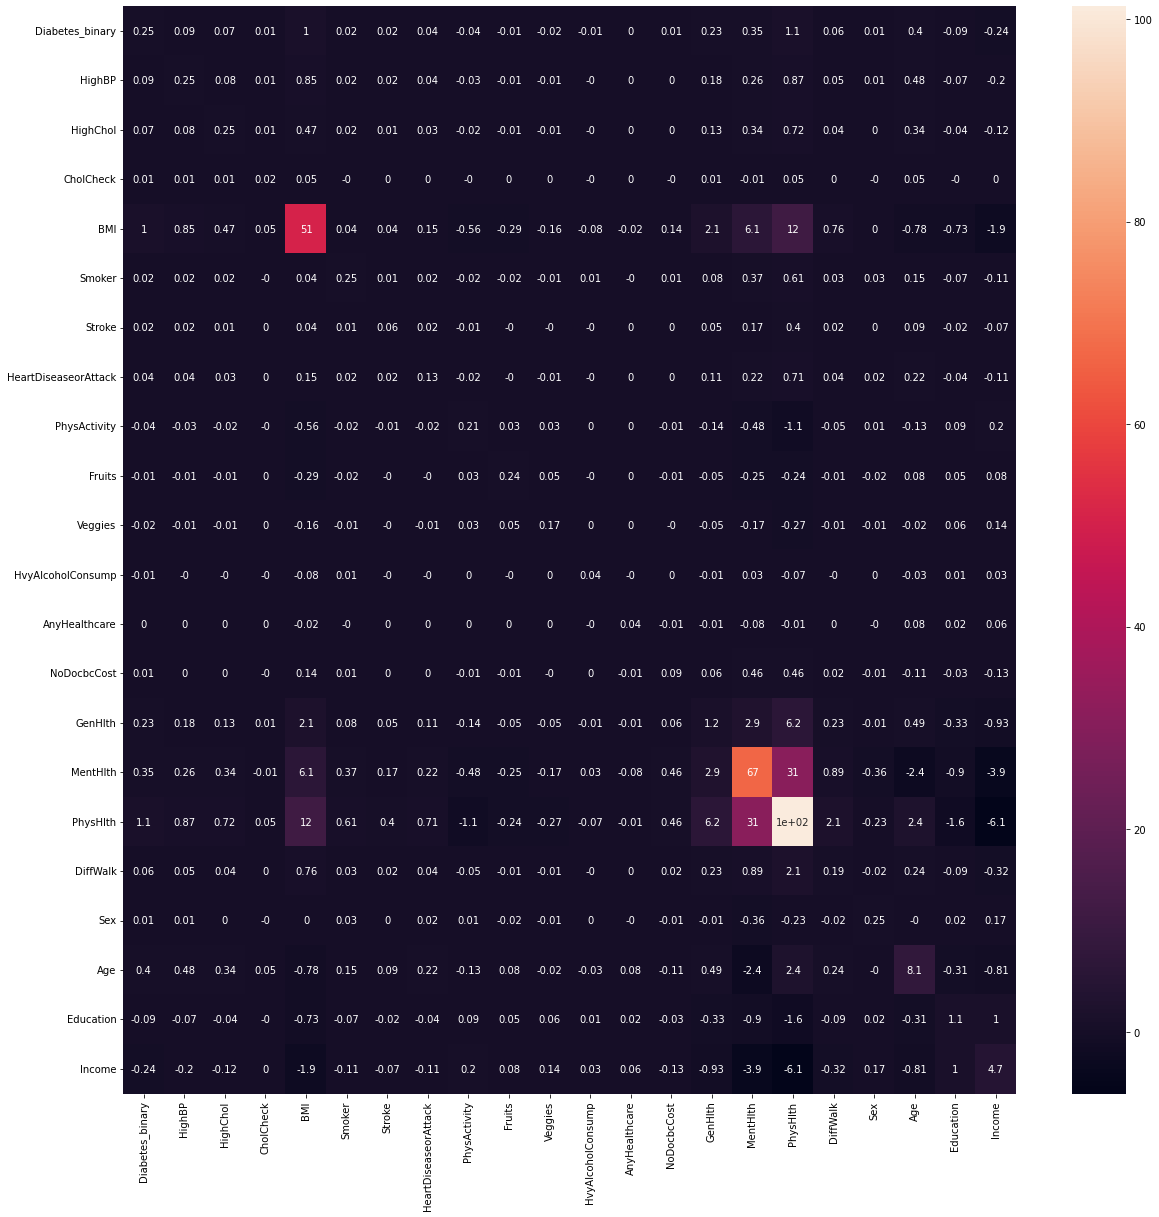

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20,20)) 
matrix = data.cov().round(2)
sns.heatmap(matrix, annot=True)
plt.show()

In [ ]:
# Python
data.cov()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
Diabetes_binary,0.250004,0.094609,0.072209,0.008962,1.043527,0.021474,0.015143,0.037537,-0.036249,-0.013177,...,0.002405,0.005977,0.226953,0.354890,1.072046,0.059244,0.011062,0.397505,-0.087720,-0.244112
HighBP,0.094609,0.245977,0.078386,0.007957,0.850371,0.021657,0.015456,0.037097,-0.030843,-0.009874,...,0.003679,0.003836,0.177029,0.260059,0.867953,0.050604,0.010085,0.478306,-0.072292,-0.202446
HighChol,0.072209,0.078386,0.249343,0.006669,0.466451,0.023291,0.012032,0.032111,-0.020638,-0.011531,...,0.003265,0.004836,0.132217,0.341600,0.716548,0.035164,0.004309,0.342289,-0.043363,-0.117063
CholCheck,0.008962,0.007957,0.006669,0.024129,0.050443,-0.000336,0.000845,0.002398,-0.000586,0.001316,...,0.003441,-0.002840,0.010243,-0.013505,0.053987,0.002999,-0.000618,0.045077,-0.001390,0.002551
BMI,1.043527,0.850371,0.466451,0.050443,50.608339,0.041038,0.039390,0.152387,-0.555634,-0.292976,...,-0.019795,0.136615,2.122164,6.073490,11.586486,0.760820,0.002932,-0.784176,-0.733787,-1.932397
Smoker,0.021474,0.021657,0.023291,-0.000336,0.041038,0.249392,0.007797,0.022052,-0.018214,-0.018207,...,-0.001340,0.005215,0.084759,0.371675,0.606507,0.025997,0.027894,0.150160,-0.072445,-0.113761
Stroke,0.015143,0.015456,0.012032,0.000845,0.039390,0.007797,0.058307,0.019145,-0.008825,-0.001059,...,0.000325,0.002550,0.050940,0.171928,0.399658,0.020176,0.000460,0.085316,-0.018370,-0.071736
HeartDiseaseorAttack,0.037537,0.037097,0.032111,0.002398,0.152387,0.022052,0.019145,0.125964,-0.015929,-0.003362,...,0.001155,0.003730,0.109028,0.217255,0.708590,0.035878,0.017355,0.224600,-0.035267,-0.113291
PhysActivity,-0.036249,-0.030843,-0.020638,-0.000586,-0.555634,-0.018214,-0.008825,-0.015929,0.208779,0.029797,...,0.002567,-0.008437,-0.139185,-0.484779,-1.078156,-0.054978,0.011780,-0.131303,0.089468,0.195352
Fruits,-0.013177,-0.009874,-0.011531,0.001316,-0.292976,-0.018207,-0.001059,-0.003362,0.029797,0.237505,...,0.002970,-0.006517,-0.053556,-0.246833,-0.238188,-0.010756,-0.021539,0.084922,0.049507,0.083755


# **Matriz de correlación lineal**

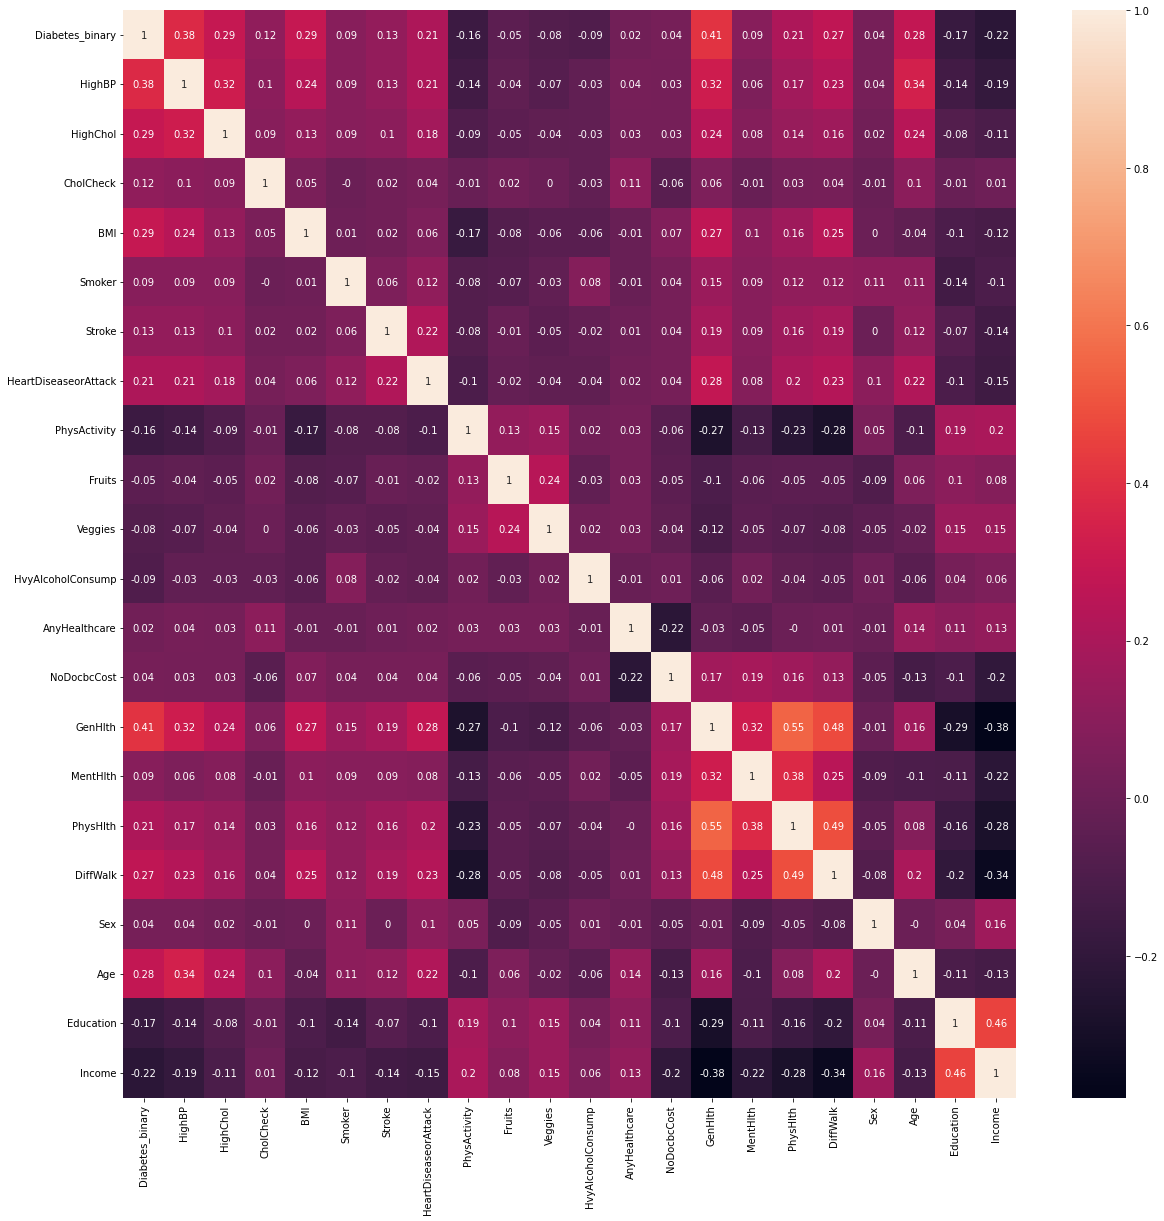

In [ ]:
plt.figure(figsize=(20,20)) 
matrix = data.corr().round(2)
sns.heatmap(matrix, annot=True)
plt.show()

Para desplegar el resumen de todas las medidas al mismo tiempo. Si un atributo es nominal solo se despliega en top el valor mas frecuente y en unique el número de valores unicos.


In [ ]:
data.describe(include='all')

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,...,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,0.500000,0.563458,0.525703,0.975259,29.856985,0.475273,0.062171,0.147810,0.703036,0.611795,...,0.954960,0.093914,2.837082,3.752037,5.810417,0.252730,0.456997,8.584055,4.920953,5.698311
std,0.500004,0.495960,0.499342,0.155336,7.113954,0.499392,0.241468,0.354914,0.456924,0.487345,...,0.207394,0.291712,1.113565,8.155627,10.062261,0.434581,0.498151,2.852153,1.029081,2.175196
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,4.000000
50%,0.500000,1.000000,1.000000,1.000000,29.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,6.000000
75%,1.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,1.000000,11.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


## **Histogramas**

*   Gráfica de la distribucion de los valores de una variable.

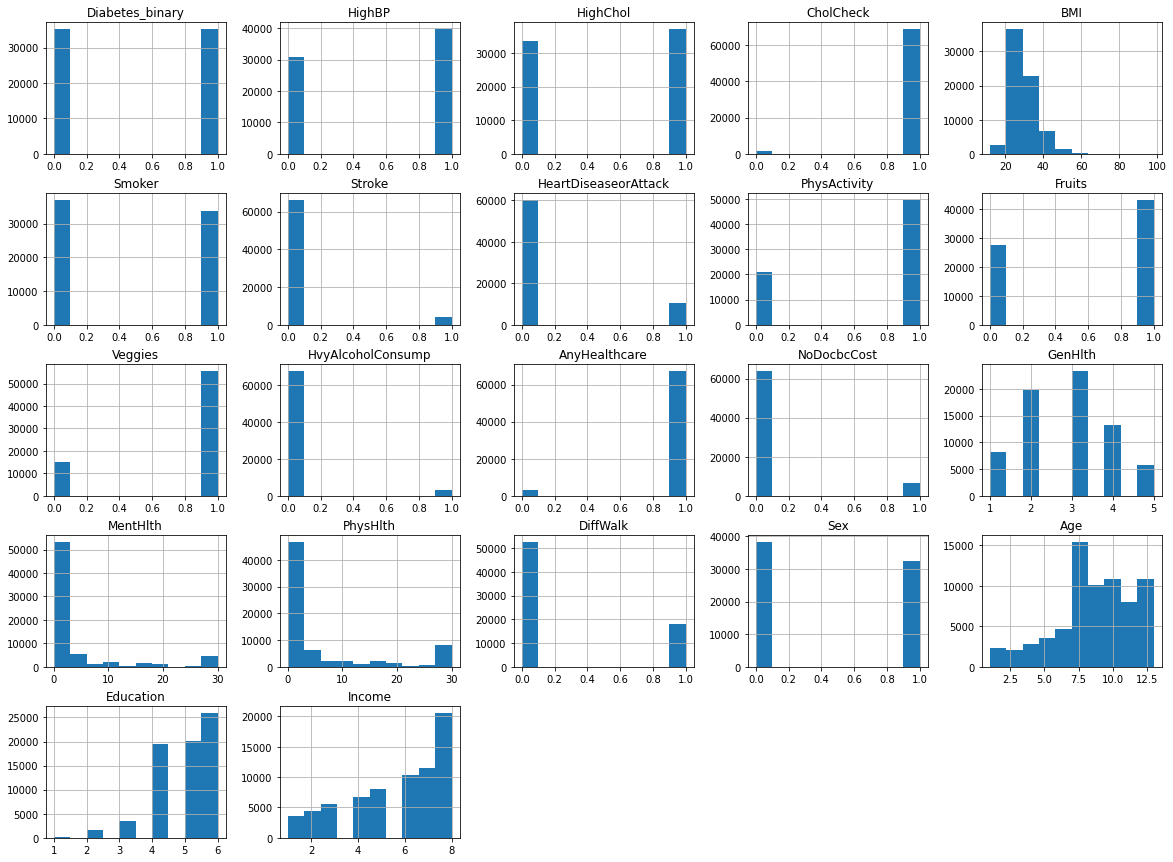

In [ ]:
data.hist(figsize=(20,15));

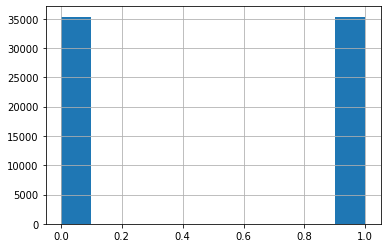

In [ ]:
#Python
hist = data['Diabetes_binary'].hist()

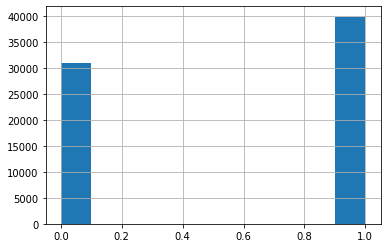

In [ ]:
#Python
hist = data['HighBP'].hist()

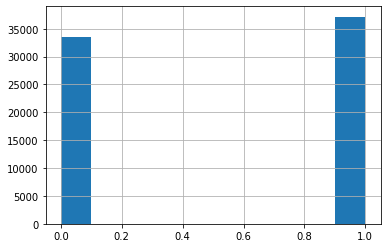

In [ ]:
#Python
hist = data['HighChol'].hist()

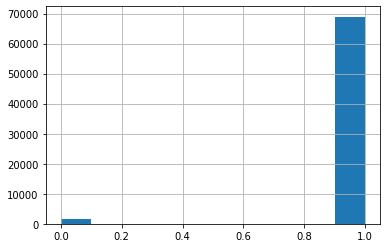

In [ ]:
#Python
hist = data['CholCheck'].hist()

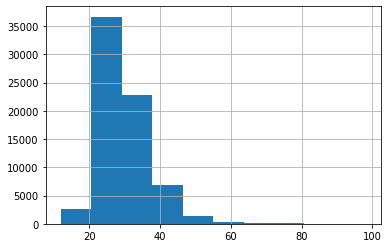

In [ ]:
#Python
hist = data['BMI'].hist()

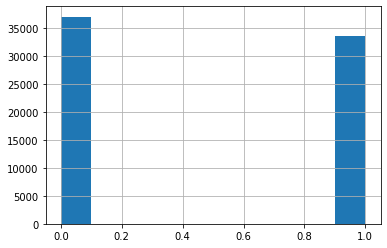

In [ ]:
#Python
hist = data['Smoker'].hist()

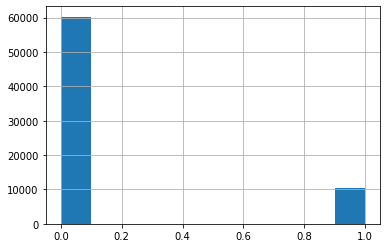

In [ ]:
#Python
hist = data['HeartDiseaseorAttack'].hist()

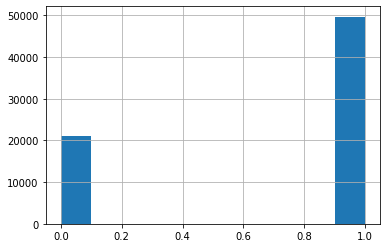

In [ ]:
#Python
hist = data['PhysActivity'].hist()

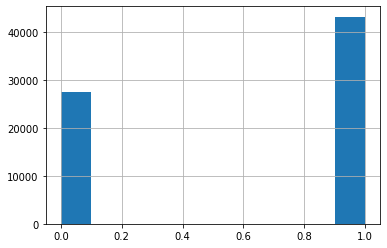

In [ ]:
#Python
hist = data['Fruits'].hist()

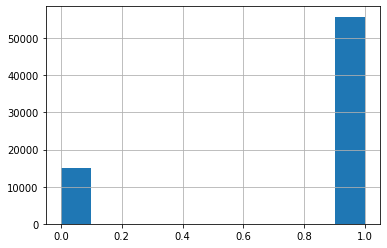

In [ ]:
#Python
hist = data['Veggies'].hist()

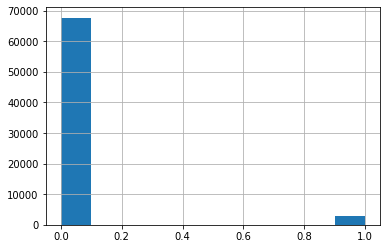

In [ ]:
#Python
hist = data['HvyAlcoholConsump'].hist()

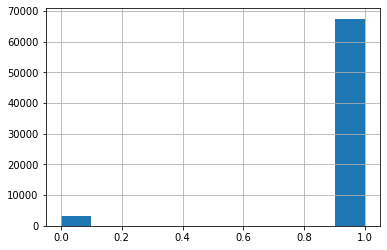

In [ ]:
#Python
hist = data['AnyHealthcare'].hist()

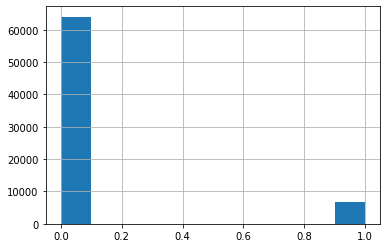

In [ ]:
#Python
hist = data['NoDocbcCost'].hist()

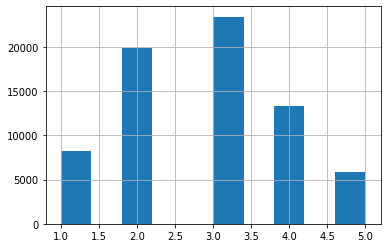

In [ ]:
#Python
hist = data['GenHlth'].hist()

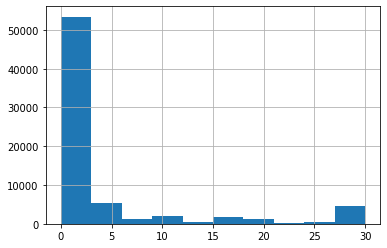

In [ ]:
#Python
hist = data['MentHlth'].hist()

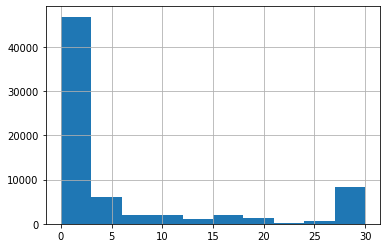

In [ ]:
#Python
hist = data['PhysHlth'].hist()

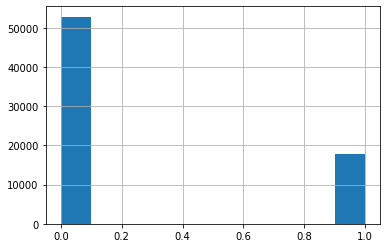

In [ ]:
#Python
hist = data['DiffWalk'].hist()

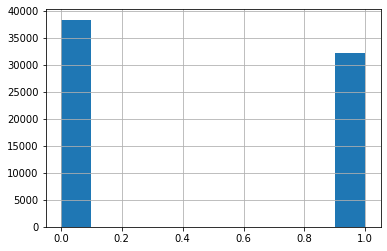

In [ ]:
#Python
hist = data['Sex'].hist()

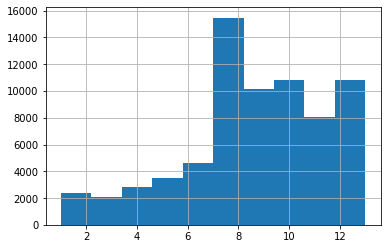

In [ ]:
#Python
hist = data['Age'].hist()

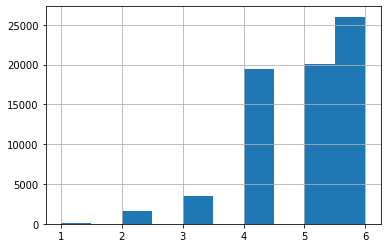

In [ ]:
#Python
hist = data['Education'].hist()

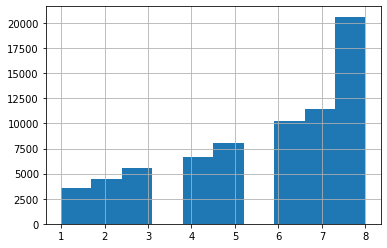

In [ ]:
#Python
hist = data['Income'].hist()

## **Estimación de densidad**


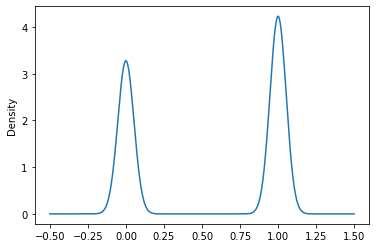

In [ ]:
ax = data['HighBP'].plot.kde()

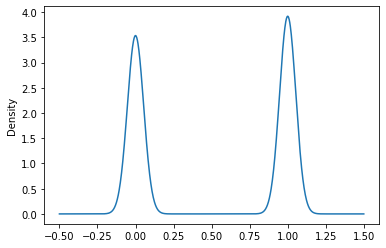

In [ ]:
ax = data['HighChol'].plot.kde()

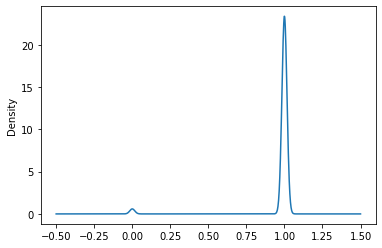

In [ ]:
ax = data['CholCheck'].plot.kde()

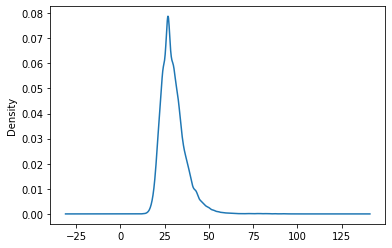

In [ ]:
ax = data['BMI'].plot.kde()

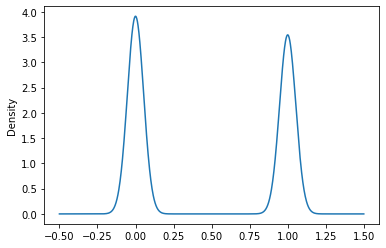

In [ ]:
ax = data['Smoker'].plot.kde()

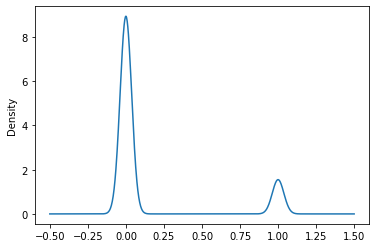

In [ ]:
ax = data['HeartDiseaseorAttack'].plot.kde()

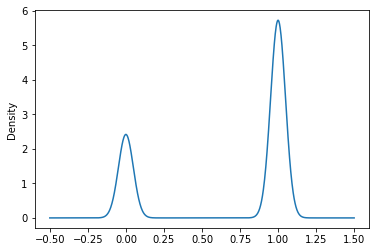

In [ ]:
ax = data['PhysActivity'].plot.kde()

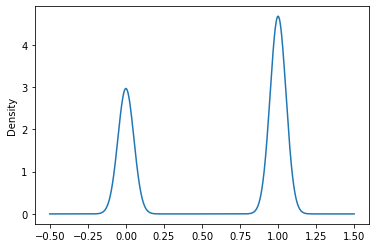

In [ ]:
ax = data['Fruits'].plot.kde()

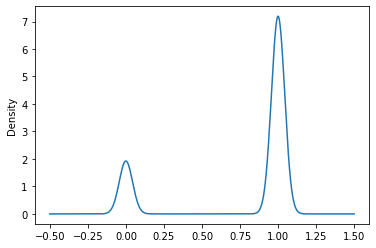

In [ ]:
ax = data['Veggies'].plot.kde()

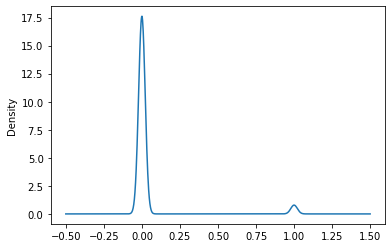

In [ ]:
ax = data['HvyAlcoholConsump'].plot.kde()

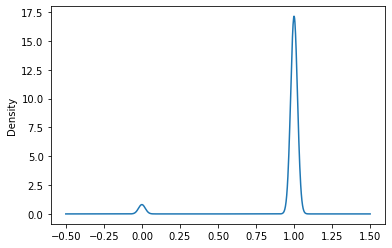

In [ ]:
ax = data['AnyHealthcare'].plot.kde()

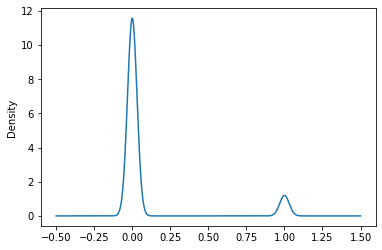

In [ ]:
ax = data['NoDocbcCost'].plot.kde()

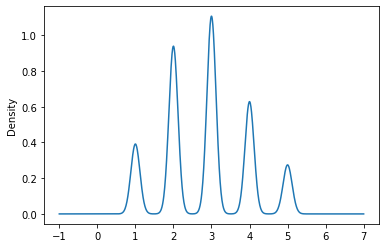

In [ ]:
ax = data['GenHlth'].plot.kde()

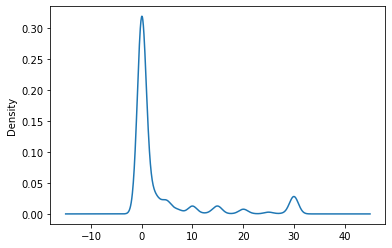

In [ ]:
ax = data['MentHlth'].plot.kde()

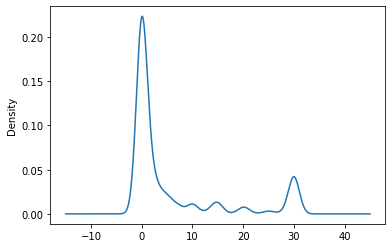

In [ ]:
ax = data['PhysHlth'].plot.kde()

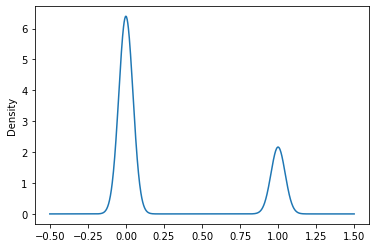

In [ ]:
ax = data['DiffWalk'].plot.kde()

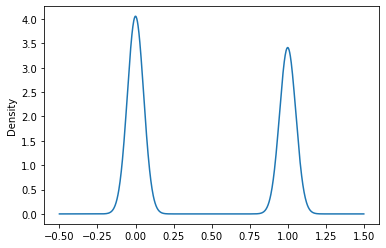

In [ ]:
ax = data['Sex'].plot.kde()

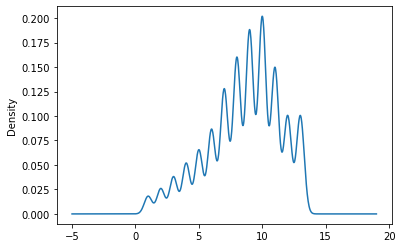

In [ ]:
ax = data['Age'].plot.kde()

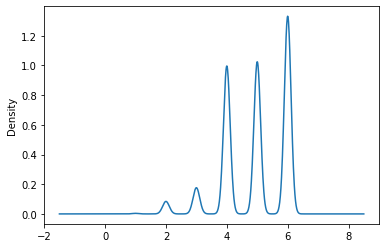

In [ ]:
ax = data['Education'].plot.kde()

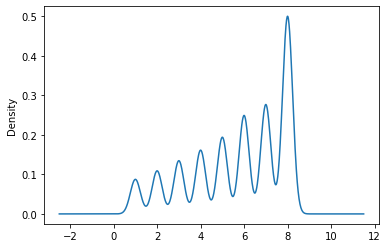

In [ ]:
ax = data['Income'].plot.kde()

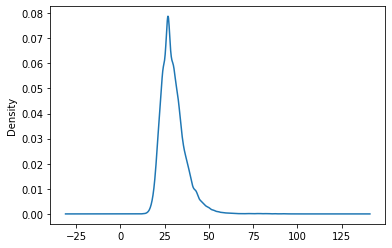

In [ ]:
ax = data['BMI'].plot.kde()

## **Diagramas de caja**

Se construyen a partir de los percentiles

En R se pueden analizar varias variables al mismo tiempo:

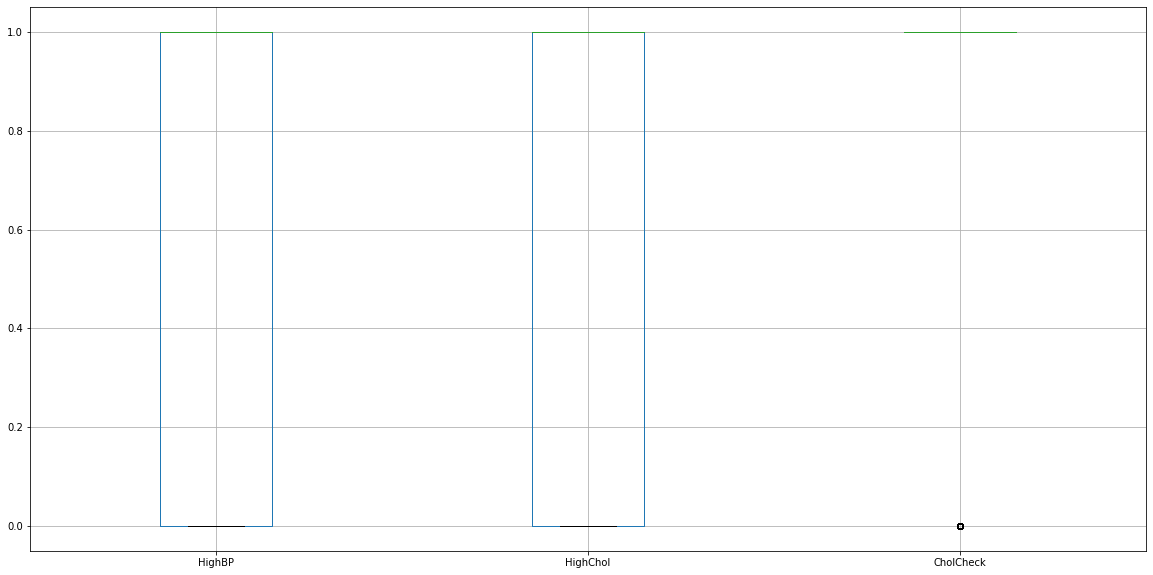

In [ ]:
import matplotlib.pyplot as plt

dt = data.iloc[:, [1,2,3]]
dt
plt.figure(figsize = (20,10)) 
dt.boxplot() 

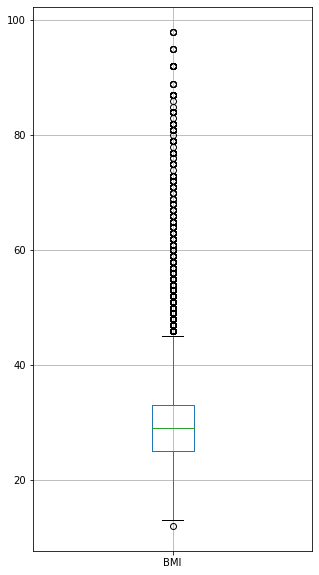

In [ ]:
dt = data.iloc[:, [4]]
dt
plt.figure(figsize = (5,10)) 
dt.boxplot() 

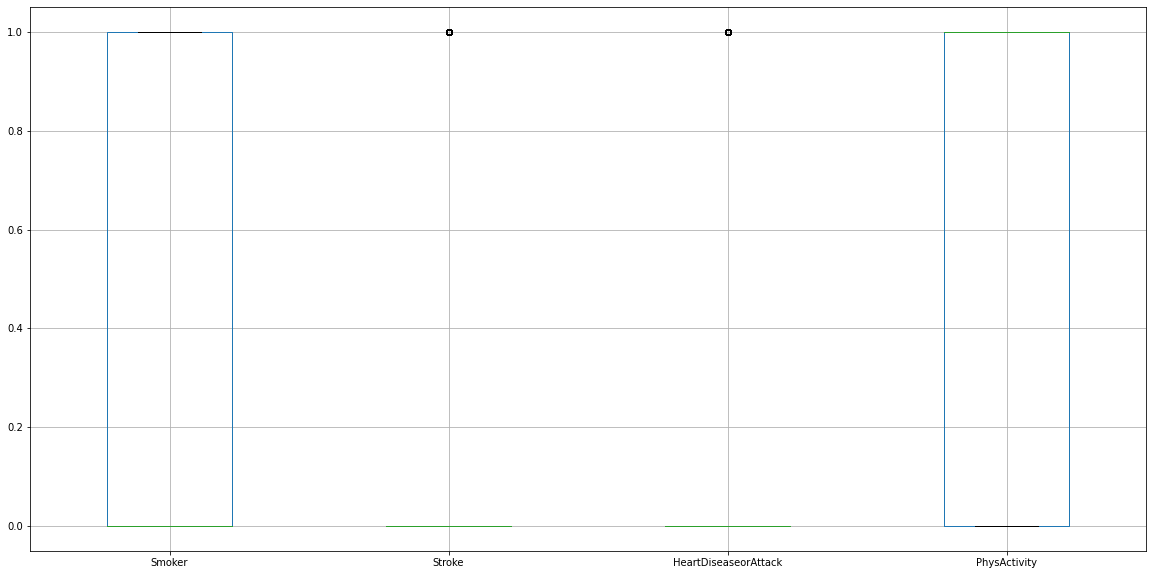

In [ ]:
dt = data.iloc[:, [5,6,7,8]]
dt
plt.figure(figsize = (20,10)) 
dt.boxplot() 

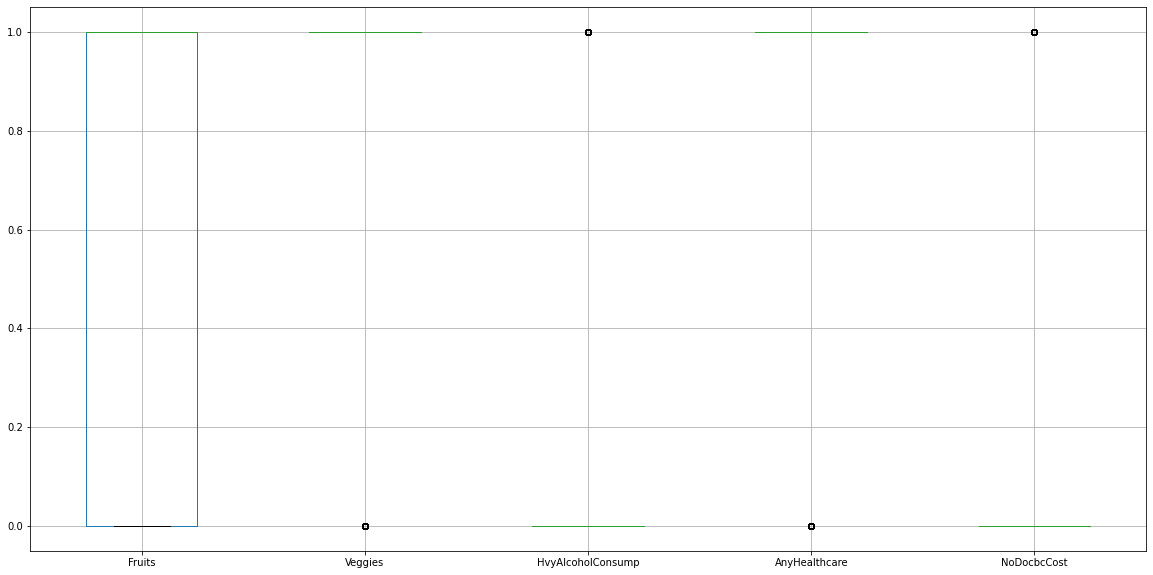

In [ ]:
dt = data.iloc[:, [9,10,11,12,13]]
dt
plt.figure(figsize = (20,10)) 
dt.boxplot() 

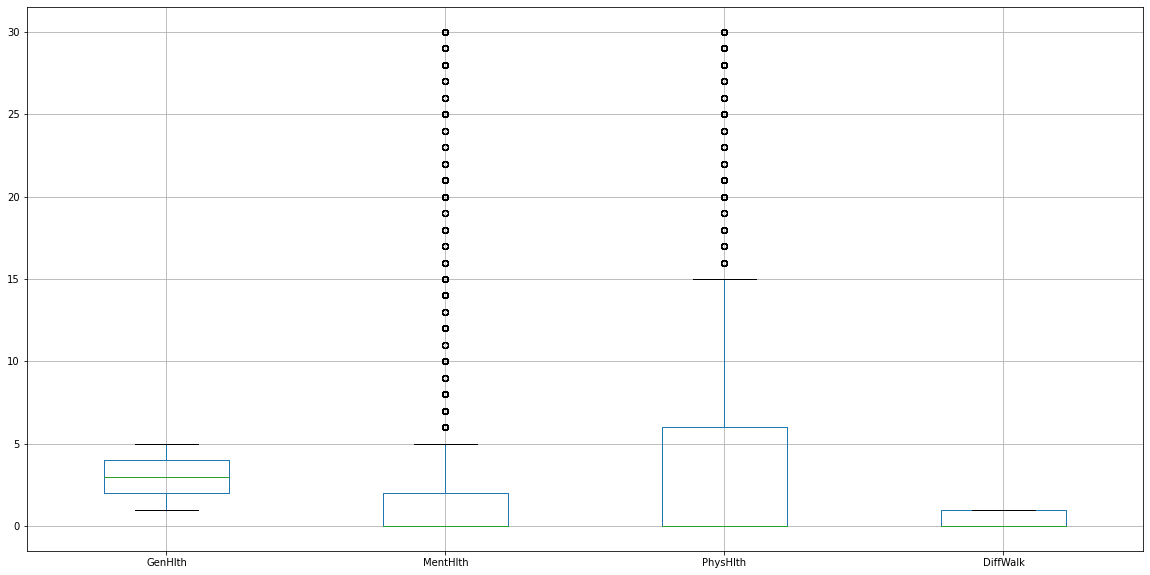

In [ ]:
dt = data.iloc[:, [14,15,16,17]]
dt
plt.figure(figsize = (20,10)) 
dt.boxplot() 

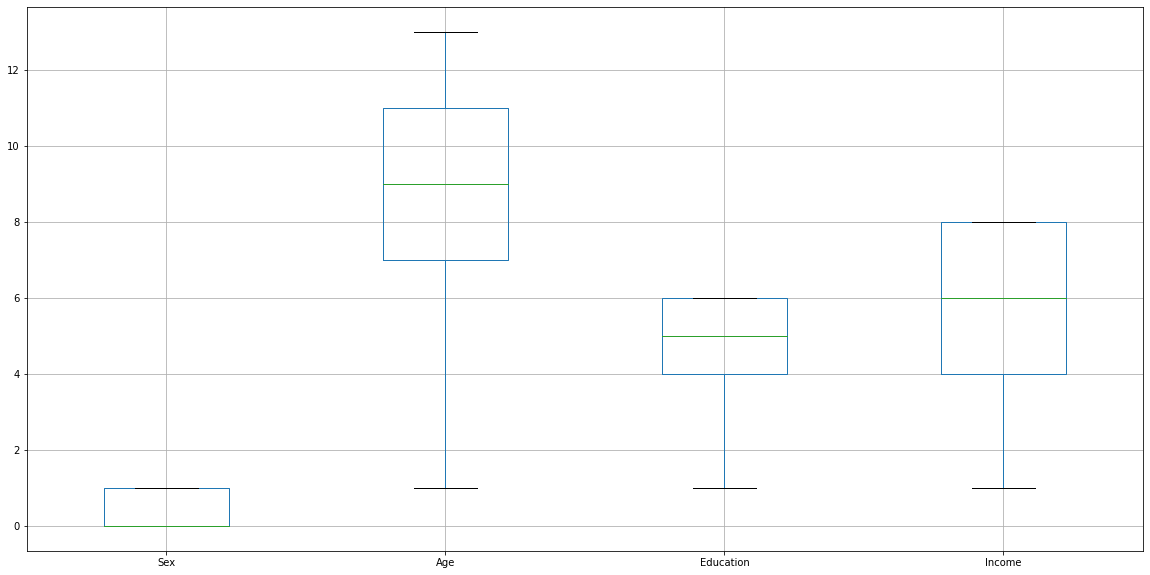

In [ ]:
dt = data.iloc[:, [18,19,20,21]]
dt
plt.figure(figsize = (20,10)) 
dt.boxplot() 

# **Diagramas de dispersión**


In [ ]:
import matplotlib.pyplot as plt 

In [ ]:
#Python
colors = {0:'r', 1:'g'}
fig, ax = plt.subplots()
for i in range(len(data['BMI'])):
    ax.scatter(data['BMI'][i], data['Age'][i],color=colors[data['Diabetes_binary'][i]])
ax.set_title('Diabetes Dataset')
ax.set_xlabel('Age')
ax.set_ylabel('BMI')

In [ ]:
colors = {0:'b', 1:'r'}
fig, ax = plt.subplots()
for i in range(len(data['HeartDiseaseorAttack'])):
    ax.scatter(data['HeartDiseaseorAttack'][i], data['HighChol'][i],color=colors[data['Diabetes_binary'][i]])
ax.set_title('Diabetes Dataset')
ax.set_ylabel('HeartDiseaseorAttack')
ax.set_xlabel('HighChol')

In [ ]:
colors = {0:'b', 1:'r'}
fig, ax = plt.subplots()
for i in range(len(data['BMI'])):
    ax.scatter(data['BMI'][i], data['Income'][i],color=colors[data['Diabetes_binary'][i]])
ax.set_title('Diabetes Dataset')
ax.set_ylabel('BMI')
ax.set_xlabel('Income')

In [ ]:
colors = {0:'b', 1:'r'}
fig, ax = plt.subplots()
for i in range(len(data['HeartDiseaseorAttack'])):
    ax.scatter(data['HeartDiseaseorAttack'][i], data['PhysActivity'][i],color=colors[data['Diabetes_binary'][i]])
ax.set_title('Diabetes Dataset')
ax.set_ylabel('HeartDiseaseorAttack')
ax.set_xlabel('PhysActivity')

In [ ]:
colors = {0:'b', 1:'r'}
fig, ax = plt.subplots()
for i in range(len(data['Age'])):
    ax.scatter(data['Age'][i], data['Sex'][i],color=colors[data['Diabetes_binary'][i]])
ax.set_title('Diabetes Dataset')
ax.set_ylabel('Age')
ax.set_xlabel('Sex')

In [ ]:
#Python
colors = {0:'r', 1:'g'}
fig, ax = plt.subplots()
for i in range(len(data['BMI'])):
    ax.scatter(data['BMI'][i], data['Age'][i],color=colors[data['Diabetes_binary'][i]])
ax.set_title('Iris Dataset')
ax.set_xlabel('sepal_length')
ax.set_ylabel('sepal_width')

In [ ]:
#Python
import seaborn as sns
g = sns.pairplot(data, hue="BMI")

# **Preprocesamiento**

# **Outliers**

In [351]:
# Python
data = pd.read_csv("./diabetes50.data", names=["Diabetes_binary", "HighBP", "HighChol", "CholCheck", "BMI", "Smoker", "Stroke", "HeartDiseaseorAttack", "PhysActivity", "Fruits", "Veggies", "HvyAlcoholConsump", "AnyHealthcare", "NoDocbcCost", "GenHlth", "MentHlth", "PhysHlth", "DiffWalk", "Sex" ,"Age" , "Education", "Income"]) 
data1 = pd.read_csv("./diabetes50.data", names=["Diabetes_binary", "HighBP", "HighChol", "CholCheck", "BMI", "Smoker", "Stroke", "HeartDiseaseorAttack", "PhysActivity", "Fruits", "Veggies", "HvyAlcoholConsump", "AnyHealthcare", "NoDocbcCost", "GenHlth", "MentHlth", "PhysHlth", "DiffWalk", "Sex" ,"Age" , "Education", "Income"]) 

In [352]:
from numpy.lib.function_base import append
media = data.mean(axis = 0)
varianza = data.var()
desv_estandar = []
for i in range(len(varianza)):
  desv_estandar.append(np.sqrt(varianza[i]))
umbral_sup = []
umbral_inf = []

for i in range(len(desv_estandar)):
  umbral_sup.append(media[i] + (2 * desv_estandar[i]))
  umbral_inf.append(media[i] - (2 * desv_estandar[i]))

In [353]:
umbral_sup

[1.5000070730111579,
 1.555378769163609,
 1.5243879459027263,
 1.2859313550700233,
 44.08489293486307,
 1.4740564835556902,
 0.5451066592059641,
 0.8576387617019869,
 1.616883516883453,
 1.5864850890013513,
 1.6051365704485616,
 0.4471760625850463,
 1.3697482738892282,
 0.6773378816831109,
 5.064211023554545,
 20.0632901128179,
 25.934938082641253,
 1.1218913455880264,
 1.4532981362989181,
 14.288360992719983,
 6.979114466923255,
 10.048702934691923]

In [354]:
umbral_inf

[-0.5000070730111579,
 -0.42846200347583674,
 -0.47298184620261885,
 0.6645863838537587,
 15.629077528555705,
 -0.5235104528874392,
 -0.4207644422648675,
 -0.5620183237457825,
 -0.21081210852041332,
 -0.36289543246312916,
 -0.027588898859131517,
 -0.3617349942887751,
 0.5401708117215908,
 -0.48950899015365923,
 0.6099529553963965,
 -12.55921610161437,
 -14.314104042014307,
 -0.6164310389055164,
 -0.5393050394845684,
 2.8797485529145987,
 2.8627912649841747,
 1.347919031018483]

In [355]:
data_clean = len(data.index)
print('Datos iniciales',data_clean)

Datos iniciales 70692


In [356]:

data = data.drop(data[(data.MentHlth > umbral_sup[15])].index)  
data_MentHlth = len(data.index)
print('Cantidad de datos despues de liminar outliers superiores de MentHlth',data_MentHlth)

Cantidad de datos despues de liminar outliers superiores de MentHlth 65632


In [357]:

data = data.drop(data[(data.PhysHlth > umbral_sup[16])].index)
data_PhysHlth = len(data.index)
print('Cantidad de datos despues de liminar outliers superiores de  PhysHlth',data_PhysHlth)

Cantidad de datos despues de liminar outliers superiores de  PhysHlth 59541


In [358]:
print('Datos eliminados en MentHlth', data_clean-data_MentHlth)
print('Datos eliminados en PhysHlth', data_MentHlth-data_PhysHlth)
print('Total datos elimnados',data_clean-data_MentHlth + data_MentHlth-data_PhysHlth)
data

Datos eliminados en MentHlth 5060
Datos eliminados en PhysHlth 6091
Total datos elimnados 11151


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0
5,0.0,0.0,0.0,1.0,18.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,2.0,7.0,0.0,0.0,0.0,1.0,4.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,1.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,0.0,0.0,6.0,4.0,1.0
70688,1.0,0.0,1.0,1.0,29.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,2.0,0.0,0.0,1.0,1.0,10.0,3.0,6.0
70689,1.0,1.0,1.0,1.0,25.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,5.0,15.0,0.0,1.0,0.0,13.0,6.0,4.0
70690,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0


# **Muestreo**
Se usa el muestreo con reemplazo para evitar datos duplicados, se usa la cuarta parte del conjunto de datos original verificando que las clases y sus respectivas dimensiones no cambien demasiado

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
18830,0.0,0.0,0.0,1.0,21.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,1.0,0.0,0.0,5.0,5.0,8.0
12679,0.0,0.0,0.0,1.0,26.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,4.0,8.0
16865,0.0,1.0,1.0,1.0,37.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,11.0,5.0,5.0
27871,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,1.0,0.0,9.0,5.0,1.0
61921,1.0,1.0,1.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,1.0,3.0,0.0,0.0,0.0,0.0,8.0,5.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6196,0.0,0.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,2.0,0.0,3.0,0.0,0.0,6.0,4.0,8.0
4985,0.0,0.0,1.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,2.0,2.0,0.0,0.0,0.0,10.0,6.0,7.0
33392,0.0,0.0,0.0,1.0,22.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,5.0,5.0,7.0
30812,0.0,1.0,1.0,1.0,27.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,11.0,5.0,8.0


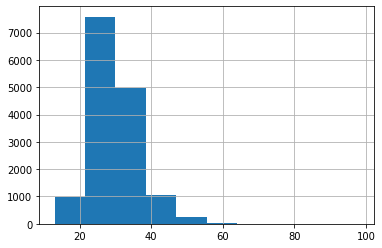

In [359]:
data_sample = data.sample(n=int(len(data)/4), replace=True)
hist = data_sample['BMI'].hist()
data_sample


In [360]:
from google.colab import files
data2 = data_sample.reset_index()
data2 = data2.drop(columns=['index'])
data2



,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,0.0,0.0,1.0,21.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,1.0,0.0,0.0,5.0,5.0,8.0
1,0.0,0.0,0.0,1.0,26.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,4.0,8.0
2,0.0,1.0,1.0,1.0,37.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,11.0,5.0,5.0
3,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,1.0,0.0,9.0,5.0,1.0
4,1.0,1.0,1.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,1.0,3.0,0.0,0.0,0.0,0.0,8.0,5.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14880,0.0,0.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,2.0,0.0,3.0,0.0,0.0,6.0,4.0,8.0
14881,0.0,0.0,1.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,2.0,2.0,0.0,0.0,0.0,10.0,6.0,7.0
14882,0.0,0.0,0.0,1.0,22.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,5.0,5.0,7.0
14883,0.0,1.0,1.0,1.0,27.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,11.0,5.0,8.0


# **Discretización**

In [361]:
from pandas._libs.hashtable import value_count
import pandas as pd

bins = pd.qcut(data2['BMI'],4)
bins.value_counts(sort=False)


(12.999, 25.0]    4284
(25.0, 28.0]      3377
(28.0, 33.0]      4008
(33.0, 98.0]      3216
Name: BMI, dtype: int64

In [362]:
# Applying the condition
data2.loc[(data2["BMI"] > 11.999) & (data2["BMI"] <= 24.0), "BMI"] = 0
data2.loc[(data2["BMI"] > 24.0) & (data2["BMI"] <= 27.0), "BMI"] = 1
data2.loc[(data2["BMI"] > 27.0) & (data2["BMI"] <= 31.0), "BMI"] = 2
data2.loc[(data2["BMI"] > 31.0) & (data2["BMI"] <= 98.0), "BMI"] = 3
data2

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,1.0,0.0,0.0,5.0,5.0,8.0
1,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,4.0,8.0
2,0.0,1.0,1.0,1.0,3.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,11.0,5.0,5.0
3,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,1.0,0.0,9.0,5.0,1.0
4,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,...,1.0,1.0,3.0,0.0,0.0,0.0,0.0,8.0,5.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14880,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,2.0,0.0,3.0,0.0,0.0,6.0,4.0,8.0
14881,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,2.0,2.0,0.0,0.0,0.0,10.0,6.0,7.0
14882,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,5.0,5.0,7.0
14883,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,11.0,5.0,8.0


# **Selección de caracteristicas**

In [363]:
import dataclasses
from inspect import cleandoc
from numpy.lib.function_base import append
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
noDiab = data2.iloc[[]]
Diab = data2.iloc[[],]
X = data2.drop('Diabetes_binary', axis = 1)
y = data2['Diabetes_binary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
rf = RandomForestClassifier(random_state = 1, max_features = 'sqrt', n_jobs = 1, verbose = 1)
%time rf.fit(X_train, y_train)
rf.score(X_test, y_test)
feature = pd.Series(rf.feature_importances_, index = X_train.columns).sort_values(ascending = False)
print(feature)

# one_column = data2.iloc[:, [4]]
# for i in range(len(one_column)):
#   if data2['Diabetes_binary'][i] == 0:
#     noDiab = pd.concat([noDiab,data2.iloc[[i],]])
#   elif data2['Diabetes_binary'][i] == 1:
#     Diab = pd.concat([Diab,data2.iloc[[i],]])

# SE_noDiab = np.sqrt(((noDiab.var())/len(noDiab)) + ((Diab.var())/len(Diab)))
# T_noDiab = np.absolute(noDiab.mean(axis = 0)-Diab.mean(axis = 0))/feature
# SE_noDiab




[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


CPU times: user 1.1 s, sys: 22 ms, total: 1.12 s
Wall time: 1.13 s
Age                     0.147245
GenHlth                 0.115916
Income                  0.096607
BMI                     0.084998
HighBP                  0.074748
PhysHlth                0.068535
Education               0.066327
MentHlth                0.050301
HighChol                0.047595
Smoker                  0.034884
Fruits                  0.033001
Sex                     0.032618
PhysActivity            0.027963
Veggies                 0.025735
HeartDiseaseorAttack    0.021959
DiffWalk                0.021917
HvyAlcoholConsump       0.013001
NoDocbcCost             0.012653
Stroke                  0.009763
AnyHealthcare           0.008193
CholCheck               0.006043
dtype: float64


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished


In [364]:
for i in range(len(feature)):
  if feature[i] < 0.0318:
    data2 = data2.drop(feature.axes[0][i], axis=1)
data2

,Diabetes_binary,HighBP,HighChol,BMI,Smoker,Fruits,GenHlth,MentHlth,PhysHlth,Sex,Age,Education,Income
0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,3.0,1.0,0.0,5.0,5.0,8.0
1,0.0,0.0,0.0,1.0,1.0,1.0,2.0,0.0,0.0,0.0,11.0,4.0,8.0
2,0.0,1.0,1.0,3.0,0.0,0.0,3.0,0.0,0.0,1.0,11.0,5.0,5.0
3,0.0,1.0,0.0,1.0,0.0,1.0,3.0,0.0,0.0,0.0,9.0,5.0,1.0
4,1.0,1.0,1.0,1.0,0.0,1.0,3.0,0.0,0.0,0.0,8.0,5.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14880,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,3.0,0.0,6.0,4.0,8.0
14881,0.0,0.0,1.0,1.0,0.0,0.0,2.0,2.0,0.0,0.0,10.0,6.0,7.0
14882,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,5.0,5.0,7.0
14883,0.0,1.0,1.0,1.0,1.0,1.0,3.0,0.0,0.0,1.0,11.0,5.0,8.0


# **PCA**

In [365]:
def de_correlate_df(df):
    X_aux = df.copy()
    for col in df.columns:
        X_aux[col] = df[col].sample(len(df)).values
        
    return X_aux

In [366]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

pca = PCA()
pca.fit(data2)
original_variance = pca.explained_variance_ratio_
N_permutations = 1000
variance = np.zeros((N_permutations, len(data2.columns)))
for i in range(N_permutations):
    X_aux = de_correlate_df(data2)
    
    pca.fit(X_aux)
    variance[i, :] = pca.explained_variance_ratio_

In [367]:
import plotly.graph_objects as go
p_val = np.sum(variance > original_variance, axis=0) / N_permutations
fig = go.Figure()
fig.add_trace(go.Scatter(x=[f'PC{i}' for i in range(len(data2.columns))], y=p_val, name='p-value on significance'))
fig.update_layout(title="PCA Permutation Test p-values")

In [368]:
data3 = StandardScaler().fit_transform(data2)
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(data3)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principalDf

,principal component 1,principal component 2
0,-2.301731,1.160680
1,-1.379185,0.148011
2,0.881267,-1.143586
3,0.114507,1.009881
4,0.622422,-0.584595
...,...,...
14880,-1.793968,1.250633
14881,-1.392588,-0.016350
14882,-3.018519,0.892057
14883,0.089209,-1.686237


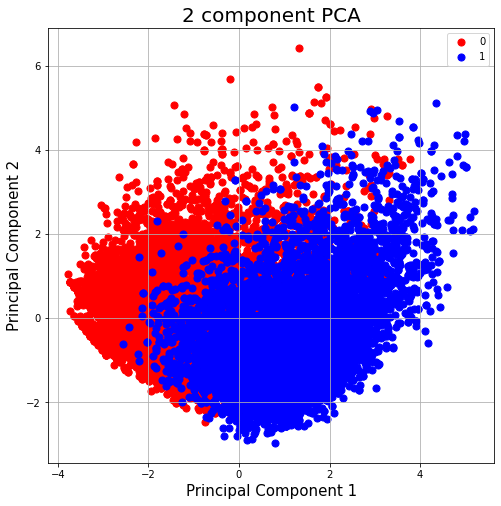

In [369]:
import matplotlib.pyplot as plt

finalDf = pd.concat([principalDf, data2[['Diabetes_binary']]], axis = 1)
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0, 1]
colors = ['r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Diabetes_binary'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

# **Asociación**

In [ ]:
pip install efficient-apriori

In [ ]:
from efficient_apriori import apriori

In [ ]:
data2

In [ ]:
dataAux = data2

In [ ]:
dataAux.loc[(dataAux["Diabetes_binary"] == 0), "Diabetes_binary"] = 'No Diabetes'
dataAux.loc[(dataAux["Diabetes_binary"] == 1), "Diabetes_binary"] = 'Diabetes'
dataAux.loc[(dataAux["HighBP"] == 0), "HighBP"] = 'Presion en Sangre Normal'
dataAux.loc[(dataAux["HighBP"] == 1), "HighBP"] = 'Alta Presion en Sangre'
dataAux.loc[(dataAux["HighChol"] == 0), "HighChol"] = 'Colesterol Normal'
dataAux.loc[(dataAux["HighChol"] == 1), "HighChol"] = 'Colesterol Alto'
dataAux.loc[(dataAux["BMI"] == 0), "BMI"] = 'BMI 0'
dataAux.loc[(dataAux["BMI"] == 1), "BMI"] = 'BMI 1'
dataAux.loc[(dataAux["BMI"] == 2), "BMI"] = 'BMI 2'
dataAux.loc[(dataAux["BMI"] == 3), "BMI"] = 'BMI 3'
dataAux.loc[(dataAux["Smoker"] == 0), "Smoker"] = 'No Fumador'
dataAux.loc[(dataAux["Smoker"] == 1), "Smoker"] = 'Fumador'
dataAux.loc[(dataAux["Fruits"] == 0), "Fruits"] = 'No frutas'
dataAux.loc[(dataAux["Fruits"] == 1), "Fruits"] = 'Si frutas'
dataAux.loc[(dataAux["GenHlth"] == 1), "GenHlth"] = 'GenHlth_1'
dataAux.loc[(dataAux["GenHlth"] == 2), "GenHlth"] = 'GenHlth_2'
dataAux.loc[(dataAux["GenHlth"] == 3), "GenHlth"] = 'GenHlth_3'
dataAux.loc[(dataAux["GenHlth"] == 4), "GenHlth"] = 'GenHlth_4'
dataAux.loc[(dataAux["GenHlth"] == 5), "GenHlth"] = 'GenHlth_5'
dataAux.loc[(dataAux["Sex"] == 0), "Sex"] = 'Mujer'
dataAux.loc[(dataAux["Sex"] == 1), "Sex"] = 'Hombre'
for i in range(len(dataAux)):
  dataAux.loc[i, 'MentHlth'] = 'MentHlth_' + str(dataAux['MentHlth'][i])
  dataAux.loc[i, 'PhysHlth'] = 'PhysHlth_' + str(dataAux['PhysHlth'][i])
  dataAux.loc[i, 'Age'] = 'Age_' + str(dataAux['Age'][i])
  dataAux.loc[i, 'Education'] = 'Education_' + str(dataAux['Education'][i])
  dataAux.loc[i, 'Income'] = 'Income_' + str(dataAux['Income'][i])

In [ ]:
data2

In [ ]:
records = []
for i in range(0, 14885):
  records.append([str(dataAux.values[i,j]) for j in range(0, 13)])

In [ ]:
from efficient_apriori import apriori as apr

In [ ]:
rule = apr(records, min_support = 0.15, min_confidence = 0.6)
output = list(rule)
output

# **Agrupación**

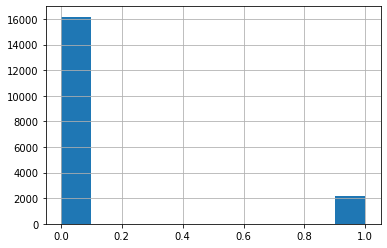

In [ ]:
hist = data2['Diabetes_binary'].hist()

In [ ]:
dataAux = data2
data2 = data2.drop(['Diabetes_binary'], axis=1)
data2

,HighBP,HighChol,BMI,Smoker,Fruits,GenHlth,MentHlth,PhysHlth,Sex,Age,Education,Income
0,1.0,0.0,3.0,1.0,1.0,3.0,0.0,0.0,0.0,5.0,5.0,8.0
1,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,13.0,6.0,8.0
2,1.0,0.0,2.0,0.0,1.0,1.0,0.0,0.0,1.0,8.0,6.0,8.0
3,1.0,0.0,0.0,1.0,1.0,2.0,0.0,0.0,1.0,11.0,5.0,8.0
4,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,13.0,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
18379,1.0,1.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,10.0,4.0,5.0
18380,0.0,0.0,3.0,0.0,1.0,3.0,0.0,0.0,0.0,12.0,6.0,8.0
18381,1.0,1.0,0.0,0.0,1.0,4.0,0.0,0.0,0.0,10.0,4.0,3.0
18382,0.0,1.0,0.0,0.0,1.0,2.0,0.0,0.0,1.0,12.0,6.0,6.0


       HighBP  HighChol  BMI  Smoker  Fruits  GenHlth  MentHlth  PhysHlth  \
0         1.0       0.0  3.0     1.0     1.0      3.0       0.0       0.0   
1         1.0       0.0  0.0     0.0     1.0      1.0       0.0       0.0   
2         1.0       0.0  2.0     0.0     1.0      1.0       0.0       0.0   
3         1.0       0.0  0.0     1.0     1.0      2.0       0.0       0.0   
4         1.0       0.0  1.0     1.0     1.0      1.0       0.0       0.0   
...       ...       ...  ...     ...     ...      ...       ...       ...   
18379     1.0       1.0  0.0     0.0     1.0      3.0       0.0       0.0   
18380     0.0       0.0  3.0     0.0     1.0      3.0       0.0       0.0   
18381     1.0       1.0  0.0     0.0     1.0      4.0       0.0       0.0   
18382     0.0       1.0  0.0     0.0     1.0      2.0       0.0       0.0   
18383     0.0       0.0  0.0     0.0     1.0      2.0       1.0       4.0   

       Sex   Age  Education  Income  
0      0.0   5.0        5.0     8.0  

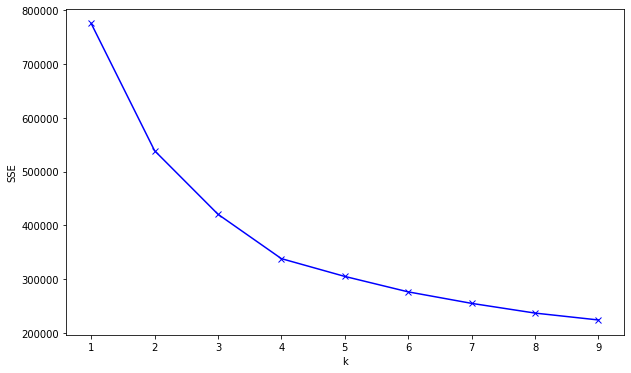

In [ ]:
from sklearn import cluster
print(data2)
Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = cluster.KMeans(n_clusters=k)
    km = km.fit(data2)
    Sum_of_squared_distances.append(km.inertia_)
    
plt.figure(figsize=(10,6)) 
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('SSE')
plt.show()

       HighBP  HighChol  BMI  Smoker  Fruits  GenHlth  MentHlth  PhysHlth  \
0         1.0       0.0  3.0     1.0     1.0      3.0       0.0       0.0   
1         1.0       0.0  0.0     0.0     1.0      1.0       0.0       0.0   
2         1.0       0.0  2.0     0.0     1.0      1.0       0.0       0.0   
3         1.0       0.0  0.0     1.0     1.0      2.0       0.0       0.0   
4         1.0       0.0  1.0     1.0     1.0      1.0       0.0       0.0   
...       ...       ...  ...     ...     ...      ...       ...       ...   
18379     1.0       1.0  0.0     0.0     1.0      3.0       0.0       0.0   
18380     0.0       0.0  3.0     0.0     1.0      3.0       0.0       0.0   
18381     1.0       1.0  0.0     0.0     1.0      4.0       0.0       0.0   
18382     0.0       1.0  0.0     0.0     1.0      2.0       0.0       0.0   
18383     0.0       0.0  0.0     0.0     1.0      2.0       1.0       4.0   

       Sex   Age  Education  Income  cluster  
0      0.0   5.0        5.0 

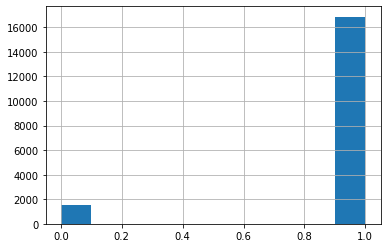

In [ ]:
from sklearn.metrics.pairwise import euclidean_distances
from sklearn import cluster

kmeans = cluster.KMeans(n_clusters=2, max_iter=2000, random_state=1)
data2['cluster'] = kmeans.fit_predict(data2)
print(data2)
hist = data2['cluster'].hist()


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

data3 = StandardScaler().fit_transform(data2)
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(data3)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['pca1', 'pca2'])
principalDfA = np.array(principalDf)
print(principalDf)

           pca1      pca2
0      0.068452 -0.458742
1     -1.459191 -0.358437
2     -1.457592 -0.294835
3     -0.588602 -1.081791
4     -0.207130 -1.295088
...         ...       ...
18379  0.743048 -1.353189
18380 -0.675280 -0.014364
18381  1.514646 -1.567078
18382 -0.938891 -0.613018
18383 -1.733985  2.114882

[18384 rows x 2 columns]


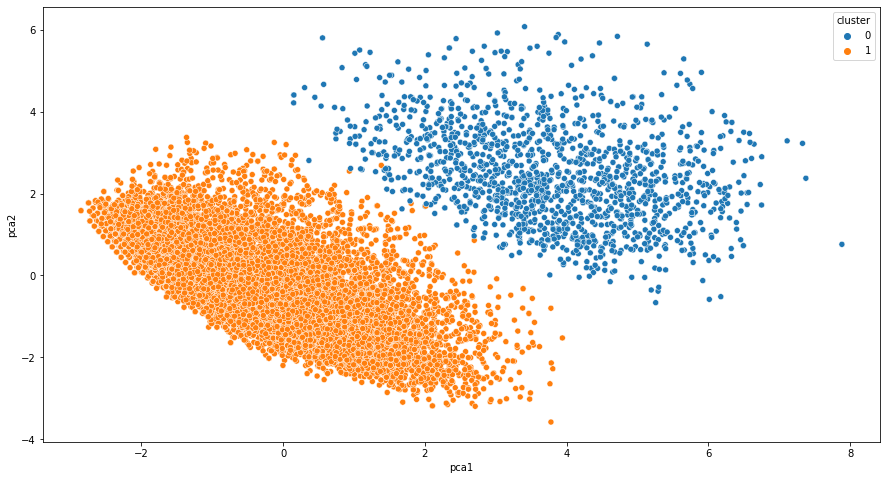

In [ ]:
import seaborn as sns
plt.figure(figsize=(15,8))
sns.scatterplot(x= "pca1", y= "pca2", hue=data2['cluster'], data=principalDf)
plt.show()

In [ ]:
aux = data2['cluster']
aux

0        1
1        1
2        1
3        1
4        1
        ..
18379    1
18380    1
18381    1
18382    1
18383    1
Name: cluster, Length: 18384, dtype: int32

In [ ]:
def perf_measure_0(class_actual, class_pred):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(class_pred)): 
        if class_actual[i]==class_pred[i]==0:
           TP += 1
        if class_pred[i]==0 and class_actual[i]!=class_pred[i]:
           FP += 1
        if class_actual[i] != 0 and class_pred[i] != 0:
           TN += 1
        if class_pred[i]==1 and class_actual[i]==0:
           FN += 1

    return(TP, FP, TN, FN)
def perf_measure_1(class_actual, class_pred):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(class_pred)): 
        if class_actual[i]== 1 and class_pred[i]==1:
           TP += 1
        elif class_pred[i]==1 and class_actual[i]==0:
           FP += 1
        elif class_actual[i] != 1 and class_pred[i] != 1:
           TN += 1
        elif (class_pred[i]==0) and class_actual[i]!=class_pred[i]:
           FN += 1

    return(TP, FP, TN, FN)

In [ ]:
TP0, FP0, TN0, FN0 = perf_measure_0(np.array(dataAux['Diabetes_binary']), np.array(aux))
TP1, FP1, TN1, FN1 = perf_measure_1(np.array(dataAux['Diabetes_binary']), np.array(aux))

In [ ]:
class_0 = TP0/(TP0+FP0)
class_1 = TP1/(TP1+FP1)
precision = (class_0+class_1)/2
precision

0.4459675273858723

In [ ]:
class_0 = TP0/(TP0+FN0)
class_1 = TP1/(TP1+FN1)

recall = (class_0+class_1)/2
recall

0.46099090151973615

In [ ]:
f1 = 2/((1/precision)+(1/recall))
f1

0.4533547866051914

In [ ]:
data2 = data2.drop(['cluster'], axis=1)

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from scipy.stats import entropy
print(f'Silhouette (n=2): {silhouette_score(data2, aux)}')
print(f'davies bouldin (n=2): {davies_bouldin_score(data2, aux)}')

Silhouette (n=2): 0.5459475147700587
davies bouldin (n=2): 0.9326447296937689


In [ ]:
from sklearn.cluster import DBSCAN

clustering = DBSCAN(eps=3.2, min_samples=100).fit(data2)
data2['cluster'] = clustering.labels_
data2

,HighBP,HighChol,BMI,Smoker,Fruits,GenHlth,MentHlth,PhysHlth,Sex,Age,Education,Income,cluster
0,1.0,0.0,3.0,1.0,1.0,3.0,0.0,0.0,0.0,5.0,5.0,8.0,0
1,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,13.0,6.0,8.0,0
2,1.0,0.0,2.0,0.0,1.0,1.0,0.0,0.0,1.0,8.0,6.0,8.0,0
3,1.0,0.0,0.0,1.0,1.0,2.0,0.0,0.0,1.0,11.0,5.0,8.0,0
4,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,13.0,5.0,5.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18379,1.0,1.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,10.0,4.0,5.0,0
18380,0.0,0.0,3.0,0.0,1.0,3.0,0.0,0.0,0.0,12.0,6.0,8.0,0
18381,1.0,1.0,0.0,0.0,1.0,4.0,0.0,0.0,0.0,10.0,4.0,3.0,0
18382,0.0,1.0,0.0,0.0,1.0,2.0,0.0,0.0,1.0,12.0,6.0,6.0,0


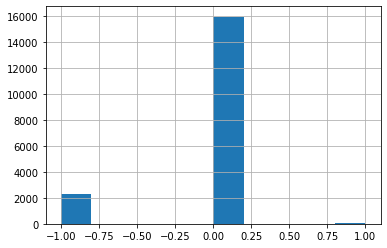

In [ ]:
hist = data2['cluster'].hist()

           pca1      pca2
0      0.055499 -0.467574
1     -1.593215 -0.514208
2     -1.548970 -0.359384
3     -0.700269 -1.160019
4     -0.281353 -1.311186
...         ...       ...
18379  0.699245 -1.393246
18380 -0.750164 -0.153339
18381  1.500939 -1.587604
18382 -1.049696 -0.730741
18383 -1.769473  1.943158

[18384 rows x 2 columns]


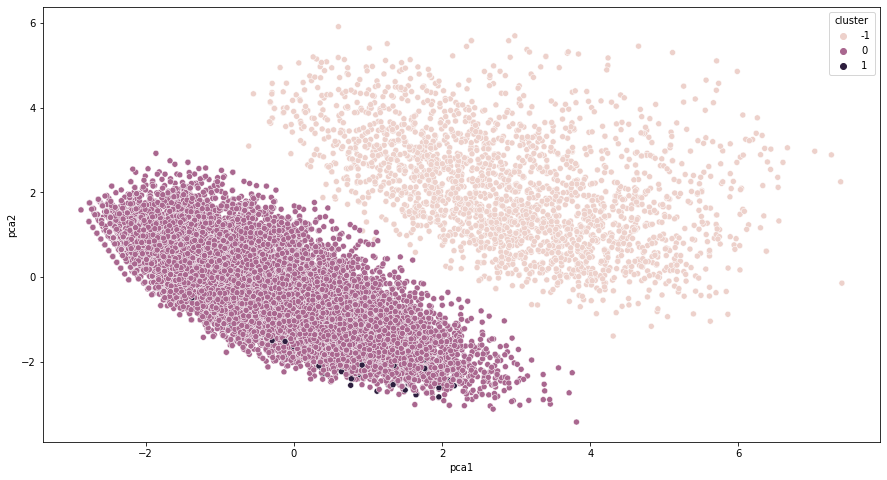

In [ ]:
data3 = StandardScaler().fit_transform(data2)
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(data3)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['pca1', 'pca2'])
principalDfA = np.array(principalDf)
print(principalDf)
plt.figure(figsize=(15,8))
sns.scatterplot(x= "pca1", y= "pca2", hue=data2['cluster'], data=principalDf)
plt.show()

In [ ]:
aux = data2['cluster']
TP0, FP0, TN0, FN0 = perf_measure_0(np.array(dataAux['Diabetes_binary']), np.array(aux))
TP1, FP1, TN1, FN1 = perf_measure_1(np.array(dataAux['Diabetes_binary']), np.array(aux))

In [ ]:
class_0 = TP0/(TP0+FP0)
class_1 = TP1/(TP1+FP1)
precision = (class_0+class_1)/2
precision

0.5350921399022188

In [ ]:
class_0 = TP0/(TP0+FN0)
class_1 = TP1/(TP1+FN1)

recall = (class_0+class_1)/2
recall

0.502214401321379

In [ ]:
f1 = 2/((1/precision)+(1/recall))
f1

0.5181322357724182

In [ ]:
data2 = data2.drop(['cluster'], axis=1)
data2

,HighBP,HighChol,BMI,Smoker,Fruits,GenHlth,MentHlth,PhysHlth,Sex,Age,Education,Income
0,1.0,0.0,3.0,1.0,1.0,3.0,0.0,0.0,0.0,5.0,5.0,8.0
1,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,13.0,6.0,8.0
2,1.0,0.0,2.0,0.0,1.0,1.0,0.0,0.0,1.0,8.0,6.0,8.0
3,1.0,0.0,0.0,1.0,1.0,2.0,0.0,0.0,1.0,11.0,5.0,8.0
4,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,13.0,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
18379,1.0,1.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,10.0,4.0,5.0
18380,0.0,0.0,3.0,0.0,1.0,3.0,0.0,0.0,0.0,12.0,6.0,8.0
18381,1.0,1.0,0.0,0.0,1.0,4.0,0.0,0.0,0.0,10.0,4.0,3.0
18382,0.0,1.0,0.0,0.0,1.0,2.0,0.0,0.0,1.0,12.0,6.0,6.0


In [ ]:
print(f'Silhouette (n=2): {silhouette_score(data2, aux)}')
print(f'davies bouldin (n=2): {davies_bouldin_score(data2, aux)}')

Silhouette (n=2): 0.45913189784235936
davies bouldin (n=2): 1.3773340917856591


[[2.00000000e+00 5.91400000e+03 0.00000000e+00 2.00000000e+00]
 [3.01000000e+02 2.21100000e+03 0.00000000e+00 2.00000000e+00]
 [2.70100000e+03 1.67120000e+04 0.00000000e+00 2.00000000e+00]
 ...
 [3.67610000e+04 3.67620000e+04 2.36431808e+01 1.73610000e+04]
 [3.67600000e+04 3.67630000e+04 2.41246762e+01 1.02300000e+03]
 [3.67640000e+04 3.67650000e+04 2.97153159e+01 1.83840000e+04]]
18383


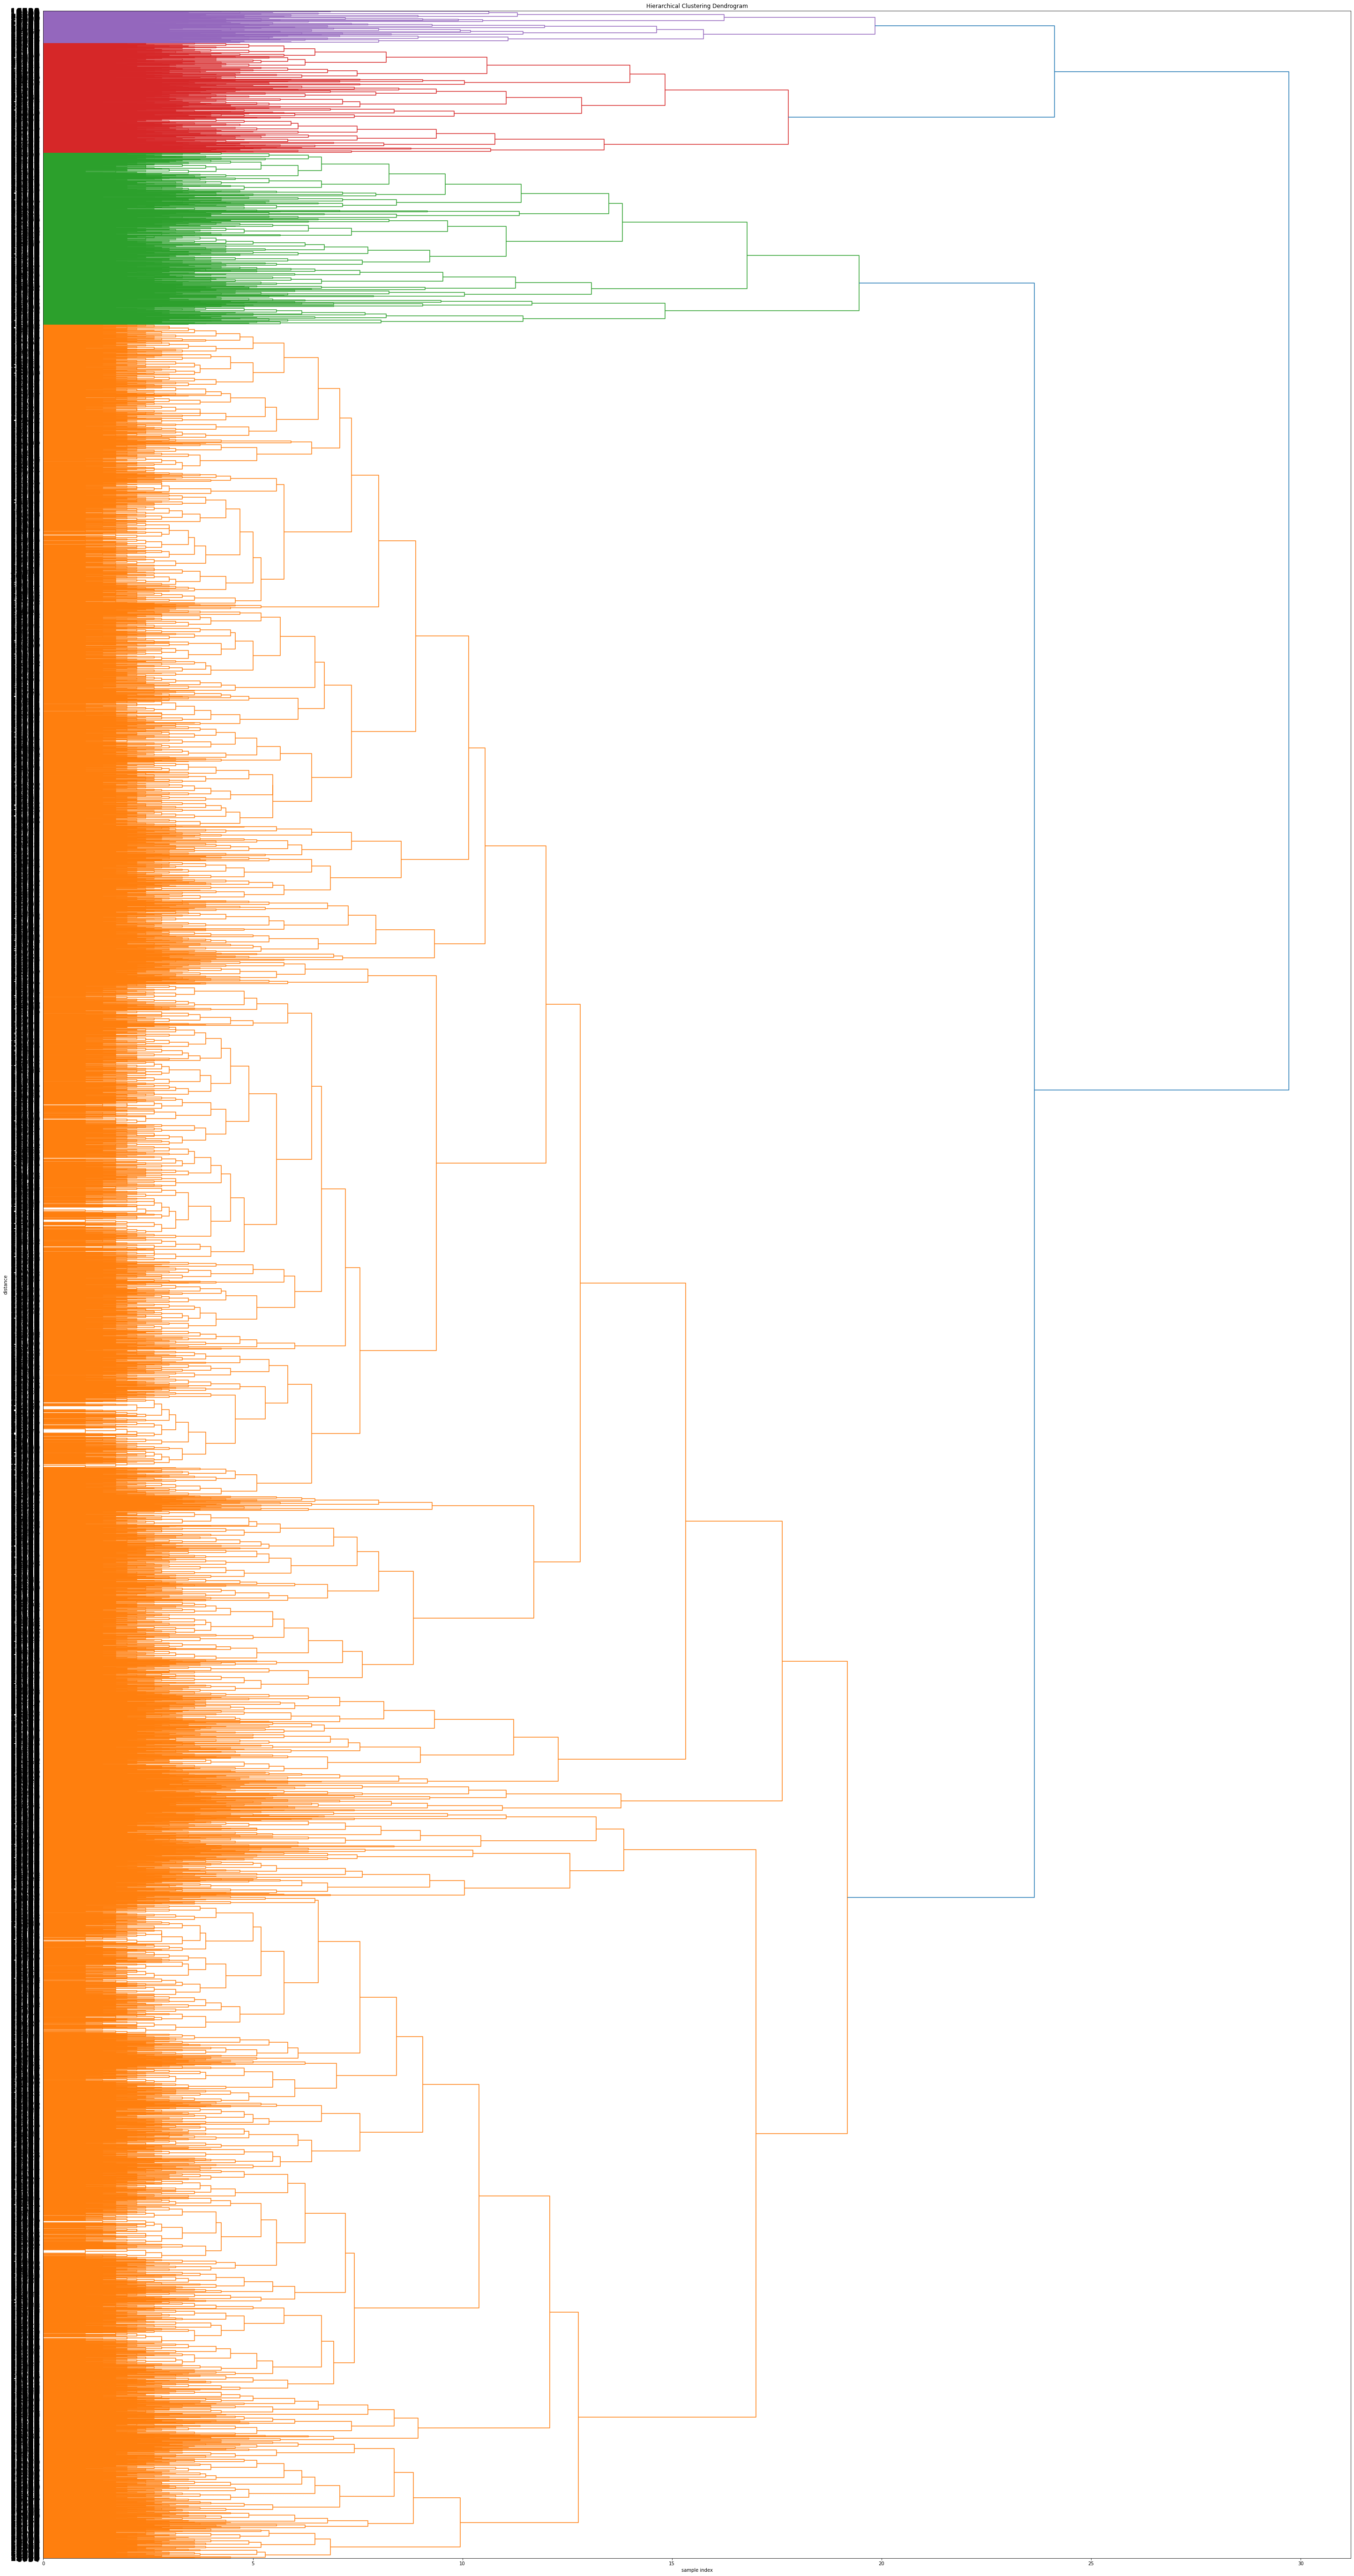

In [ ]:
from numpy.lib.function_base import average
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt
%matplotlib inline
data3 = data2.to_csv('diabetes_3.csv', header=True, index=True)
data = pd.read_csv('diabetes_3.csv',header='infer')
data.drop('Unnamed: 0', inplace=True, axis=1)
Z = hierarchy.complete(data)
print(Z)
print(len(Z))
plt.figure(figsize=(50, 100))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dn = hierarchy.dendrogram(Z,orientation='right',leaf_font_size=20.)


In [ ]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete')

In [ ]:
data['cluster'] = cluster.fit_predict(data)

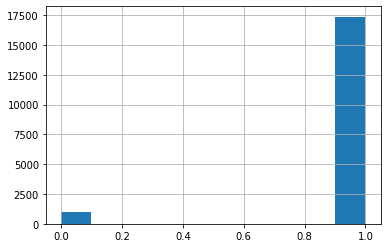

In [ ]:
hist = data['cluster'].hist()

# **Clasificación**

In [ ]:
# Python
#data = pd.read_csv("./diabetes_3.data", names=["Diabetes_binary", "HighBP", "HighChol", "CholCheck", "BMI", "Smoker", "Stroke", "HeartDiseaseorAttack", "PhysActivity", "Fruits", "Veggies", "HvyAlcoholConsump", "AnyHealthcare", "NoDocbcCost", "GenHlth", "MentHlth", "PhysHlth", "DiffWalk", "Sex" ,"Age" , "Education", "Income"]) 

In [187]:
import numpy as np
import pandas as pd
from typing import Dict, Any, List
from sklearn.base import clone
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import StratifiedKFold,cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,make_scorer
from sklearn.ensemble import RandomForestClassifier
from sklearn.base import clone
from sklearn.model_selection import StratifiedKFold,cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score

In [188]:
## boosting classifier ##
class BoostingClassifier(object):
    #initializer
    def __init__(self, 
                 weak_learner : Any, 
                 n_elements : int = 100, 
                 learning_rate : float = 0.01, 
                 record_training_f1 : bool = False) -> None:
        self.weak_learner  = weak_learner
        self.n_elements    = n_elements
        self.learning_rate = learning_rate
        self.f             = []
        self.model_weights = []
        self.f1s           = []
        self.record_f1s    = record_training_f1
        
    #destructor
    def __del__(self) -> None:
        del self.weak_learner
        del self.n_elements
        del self.learning_rate
        del self.f
        del self.model_weights
        del self.f1s
        #public function to return model parameters
    def get_params(self, deep : bool = False) -> Dict:
        return {'weak_learner':self.weak_learner,'n_elements':self.n_elements,'learning_rate':self.learning_rate}
    
    #public function to train the ensemble
    def fit(self, X_train : np.array, y_train : np.array) -> None:
        #initialize sample weights, residuals, & model array
        w = np.ones((y_train.shape[0]))
        self.residuals = []
        self.f = []
        #loop through the specified number of iterations in the ensemble
        for _ in range(self.n_elements):
            #make a copy of the weak learner
            model = clone(self.weak_learner)
            #fit the weak learner on the current dataset
            model.fit(X_train,y_train,sample_weight=w)
            #update the sample weights
            y_pred = model.predict(X_train)
            m      = y_pred != y_train
            w[m]  *= np.exp(self.learning_rate)
            #append resulting model
            self.f.append(model)
            #append current count of correctly labeled samples
            self.model_weights.append(np.sum(y_pred == y_train))
            #append current f1 score
            if self.record_f1s:
                self.f1s.append(self.__compute_f1(X_train,y_train))
        #normalize the model weights
        self.model_weights /= np.sum(self.model_weights)
        # private function to compute f1 score for n-trained weak learners
    def __compute_f1(self, X_train : np.array, y_train : np.array) -> float:
        #initialize output
        y_pred = np.zeros((X_train.shape[0]))
        #normalize model weights
        n_model_weights = self.model_weights/np.sum(self.model_weights)
        #traverse ensemble to generate predictions
        for model,mw in zip(self.f,n_model_weights):
            y_pred += mw*model.predict_proba(X_train)[:,1]
        #combine output from ensemble
        y_pred = np.round(y_pred).astype(int)
        #return computed f1 score
        return(f1_score(y_train,y_pred))
    
    #public function to return training f1 scores
    def get_f1s(self) -> List:
        return(self.f1s)
    
    #public function to generate predictions
    def predict(self, X_test : np.array) -> np.array:
        #initialize output
        y_pred = np.zeros((X_test.shape[0]))
        #traverse ensemble to generate predictions
        for model,mw in zip(self.f,self.model_weights):
            y_pred += mw*model.predict_proba(X_test)[:,1]
        #combine output from ensemble
        y_pred = np.round(y_pred).astype(int)
        #return predictions
        return(y_pred)

In [370]:
y = data2.Diabetes_binary
data2.drop('Diabetes_binary', inplace=True, axis=1)
X = data2


In [371]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=.3)

In [372]:
weak_m = DecisionTreeClassifier(max_depth=1)
learning_rates = [0.1]

In [213]:
dfF1 = pd.DataFrame()
for lr in learning_rates:
    #declare a boosting regressor
    clf = BoostingClassifier(weak_learner=weak_m, n_elements=300, learning_rate=lr, record_training_f1=True)
    
    #fit the model
    clf.fit(X_train,y_train)
    
    #record F1 scores
    dfF1[str(lr)] = clf.get_f1s()

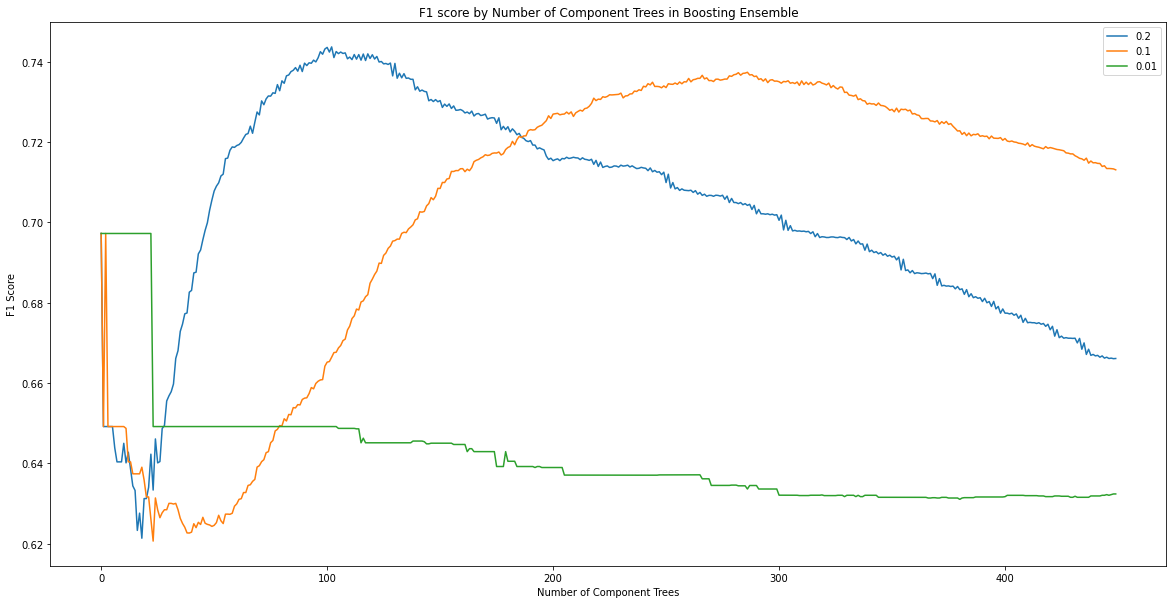

In [209]:
dfF1.plot(figsize=(20, 10))
plt.title('F1 score by Number of Component Trees in Boosting Ensemble')
plt.xlabel('Number of Component Trees')
plt.ylabel('F1 Score')
plt.show()

In [221]:
from sklearn.metrics import classification_report, confusion_matrix
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False, cmap=plt.cm.Blues):

    title = 'Matriz de confusión boosting'
    cm = confusion_matrix(y_true, y_pred)
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='Clase Verdadera',
           xlabel='Clase Predicción')

    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="red" if cm[i, j] > thresh else "red")
    fig.tight_layout()
    return ax

<Figure size 1440x1440 with 0 Axes>

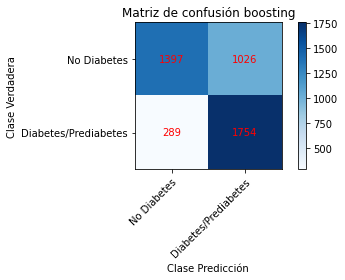

              precision    recall  f1-score   support

         0.0       0.83      0.58      0.68      2423
         1.0       0.63      0.86      0.73      2043

    accuracy                           0.71      4466
   macro avg       0.73      0.72      0.70      4466
weighted avg       0.74      0.71      0.70      4466



In [222]:
 
y_pred = clf.predict(X_test)
class_names = ['No Diabetes', 'Diabetes/Prediabetes']
plot_confusion_matrix(y_test, y_pred, classes=class_names)
plt.show()
print(classification_report(y_test, y_pred, digits=2))

In [373]:
from sklearn.ensemble import GradientBoostingClassifier

boost = GradientBoostingClassifier(learning_rate=0.1, n_estimators=300)

scoring_metrics = ['accuracy','precision','recall','f1']
dcScores        = cross_validate(clf,X,y,cv=StratifiedKFold(10),scoring=scoring_metrics)

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



In [374]:
print('Mean Accuracy: %.2f' % np.mean(dcScores['test_accuracy']))
print('Mean Precision: %.2f' % np.mean(dcScores['test_precision']))
print('Mean Recall: %.2f' % np.mean(dcScores['test_recall']))
print('Mean F1: %.2f' % np.mean(dcScores['test_f1']))

Mean Accuracy: 0.66
Mean Precision: 0.60
Mean Recall: 0.58
Mean F1: 0.54


In [343]:
class BaggedTreeClassifier(object):
    #initializer
    def __init__(self,n_elements=1000):
        self.n_elements = n_elements
        self.models     = []
    
    #destructor
    def __del__(self):
        del self.n_elements
        del self.models
        
    #private function to make bootstrap samples
    def __make_bootstraps(self,data2):
        #initialize output dictionary & unique value count
        dc   = {}
        unip = 0
        #get sample size
        b_size = data2.shape[0]
        #get list of row indexes
        idx = [i for i in range(b_size)]
        #loop through the required number of bootstraps
        for b in range(self.n_elements):
            #obtain boostrap samples with replacement
            sidx   = np.random.choice(idx,replace=True,size=b_size)
            b_samp = data2[sidx,:]
            #compute number of unique values contained in the bootstrap sample
            unip  += len(set(sidx))
            #obtain out-of-bag samples for the current b
            oidx   = list(set(idx) - set(sidx))
            o_samp = np.array([])
            if oidx:
                o_samp = data2[oidx,:]
            #store results
            dc['boot_'+str(b)] = {'boot':b_samp,'test':o_samp}
        #return the bootstrap results
        return(dc)
        #public function to return model parameters
    def get_params(self, deep = False):
        return {'n_elements':self.n_elements}

    #train the ensemble
    def fit(self,X_train,y_train,print_metrics=False):
        #package the input data
        training_data = np.concatenate((X_train,y_train.reshape(-1,1)),axis=1)
        #make bootstrap samples
        dcBoot = self.__make_bootstraps(training_data)
        #iterate through each bootstrap sample & fit a model ##
        cls = DecisionTreeClassifier(class_weight='balanced')
        for b in dcBoot:
            #make a clone of the model
            model = clone(cls)
            #fit a decision tree classifier to the current sample
            model.fit(dcBoot[b]['boot'][:,:-1],dcBoot[b]['boot'][:,-1].reshape(-1, 1))
            #append the fitted model
            self.models.append(model)

            
    #predict from the ensemble
    def predict(self,X):
        #check we've fit the ensemble
        if not self.models:
            print('You must train the ensemble before making predictions!')
            return(None)
        #loop through each fitted model
        predictions = []
        for m in self.models:
            #make predictions on the input X
            yp = m.predict(X)
            #append predictions to storage list
            predictions.append(yp.reshape(-1,1))
        #compute the ensemble prediction
        ypred = np.round(np.mean(np.concatenate(predictions,axis=1),axis=1)).astype(int)
        #return the prediction
        return(ypred)

In [344]:
y = data2.Diabetes_binary
data2.drop('Diabetes_binary', inplace=True, axis=1)
X = data2
X = np.array(X)
y = np.array(y)

In [345]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=.3)

In [346]:
## declare an ensemble instance with default parameters ##
ens = BaggedTreeClassifier()

## train the ensemble & view estimates for prediction error ##
ens.fit(X_train,y_train,print_metrics=True)

In [347]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False, cmap=plt.cm.Blues):

    title = 'Matriz de confusión bagging'
    cm = confusion_matrix(y_true, y_pred)
    
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='Clase Verdadera',
           xlabel='Clase Predicción')

    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="red" if cm[i, j] > thresh else "red")
    fig.tight_layout()
    return ax

[0. 1. 1. ... 1. 0. 0.]


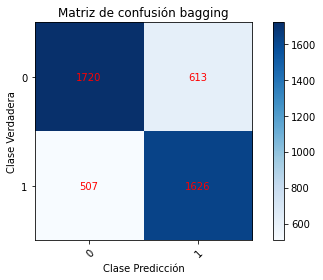

              precision    recall  f1-score   support

         0.0       0.77      0.74      0.75      2333
         1.0       0.73      0.76      0.74      2133

    accuracy                           0.75      4466
   macro avg       0.75      0.75      0.75      4466
weighted avg       0.75      0.75      0.75      4466



In [348]:

print(np.array(y_test))
y_pred = ens.predict(X_test)
class_names = ['No Diabetes', 'Diabetes / Prediabetes']
plot_confusion_matrix(y_test, y_pred, classes=class_names)
plt.show()
print(classification_report(y_test, y_pred, digits=2))

In [349]:
scoring_metrics = ['accuracy','precision','recall','f1']
dcScores        = cross_validate(ens,X,y,cv=StratifiedKFold(10),scoring=scoring_metrics)

In [350]:
print('Mean Accuracy: %.2f' % np.mean(dcScores['test_accuracy']))
print('Mean Precision: %.2f' % np.mean(dcScores['test_precision']))
print('Mean Recall: %.2f' % np.mean(dcScores['test_recall']))
print('Mean F1: %.2f' % np.mean(dcScores['test_f1']))

Mean Accuracy: 0.76
Mean Precision: 0.74
Mean Recall: 0.76
Mean F1: 0.75
